# Hypothesis Testing and Classification Model Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, f1_score
                             , recall_score, classification_report, mean_squared_error, auc
                             , precision_recall_curve, RocCurveDisplay)
from sklearn.model_selection import cross_val_score, train_test_split

#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from colorama import Fore

## Function to perform Chi-Squared Test on the dataset

In [2]:
# STATISTICALLY SIGNIFICANT AND NON SIGNIFICANT VARIABLES
# CALCULATING AND INTERPRETTING BOTH P VALUE AND TEST STATISTIC VALUE
def Stat(d, t):
    
    # lists that will hold the significant and non significant features
    Sig=[]
    Non_sig=[]
    
    # defining confidence level and probability for statistical testing
    alpha = 0.05
    prob = 1-alpha
    
    for i in d.columns:
        data_table = pd.crosstab(d[i],t)
        stat,p,dof,expected = chi2_contingency(data_table)
        critical = chi2.ppf(prob, dof)

        if p<= alpha and abs(stat) >= critical:
            print(Fore.GREEN+'p is statistically significant with',i,p)
            print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
            print('statistic value is significant  (reject H0)\n')
            Sig.append(i)

        if p> alpha and abs(stat) < critical:
            print(Fore.RED+'p is statistically not significant with',i,p)
            print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
            print('statistic value is not significant (fail to reject H0)\n')
            Non_sig.append(i)
                
    return Sig, Non_sig

## NAMCS dataset for chi-squared test

In [3]:
# namcs dataset
df = pd.DataFrame(pd.read_excel("namcs_features_FINAL.xlsx"))
# Depression Indicator
target = df['DI']

# WE ARE DROPPING THESE COLUMNS 'PSYCHOTH', 'DEPRN', 'DEPRESS', 'MENTAL', 'PSYCHOTH', 'DIAGALL'
# BECAUSE THEY ARE PART OF DEPRESSION INDICATOR CALCULATION - DI

df1 = df.drop(['SEQN','DI','PSYCHOTH', 'DEPRN', 'DEPRESS', 'MENTAL', 'PSYCHOTH','DIAGALL'], axis=1)

## Retrieving Statistically Significant and Non-significant Features for NAMCS

In [4]:
namcs_sig, namcs_non = Stat(df1, target)

p is statistically significant with AGE 3.8945972750688357e-13
probability=0.950, critical=96.217, stat=198.706
statistic value is significant  (reject H0)

p is statistically significant with SEXML 4.4211211300461036e-05
probability=0.950, critical=3.841, stat=16.681
statistic value is significant  (reject H0)

p is statistically significant with RACEWH 0.04017824866140956
probability=0.950, critical=3.841, stat=4.210
statistic value is significant  (reject H0)

p is statistically not significant with RACEBL 0.11328907163698385
probability=0.950, critical=3.841, stat=2.508
statistic value is not significant (fail to reject H0)

p is statistically not significant with RACEOT 0.2565276432678608
probability=0.950, critical=3.841, stat=1.287
statistic value is not significant (fail to reject H0)

p is statistically not significant with NOPROVID 0.41136653334410456
probability=0.950, critical=3.841, stat=0.675
statistic value is not significant (fail to reject H0)

p is statistically signi

## NHANES dataset for chi-squared test

In [5]:
# nhanes dataset
df_ = pd.DataFrame(pd.read_excel("nhanes_features_FINAL.xlsx"))
# Depression Indicator
target_ = df_['DI']

# WE ARE DROPPING THESE COLUMNS 'DLQ140', 'DLQ150', 'DLQ170','PHQSCR','DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 
#'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'
# BECAUSE THEY ARE PART OF DEPRESSION INDICATOR CALCULATION - DI

df1_ = df_.drop(['SEQN','DI','DLQ140', 'DLQ150', 'DLQ170','PHQSCR','DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 
                 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'], axis=1)

## Retrieving Statistically Significant and Non-significant Features for NHANES

In [6]:
nhanes_sig, nhanes_non = Stat(df1_, target_)

p is statistically significant with AGE 0.031169344259373052
probability=0.950, critical=81.381, stat=84.336
statistic value is significant  (reject H0)

p is statistically significant with INDHHIN2 3.936574817639932e-37
probability=0.950, critical=23.685, stat=210.484
statistic value is significant  (reject H0)

p is statistically significant with MCQ010 6.873873609517555e-16
probability=0.950, critical=3.841, stat=65.169
statistic value is significant  (reject H0)

p is statistically significant with MCQ080 3.889666938644342e-19
probability=0.950, critical=3.841, stat=79.925
statistic value is significant  (reject H0)

p is statistically significant with MCQ160A 1.196153517956054e-41
probability=0.950, critical=3.841, stat=182.783
statistic value is significant  (reject H0)

p is statistically significant with MCQ160B 4.593087316206057e-14
probability=0.950, critical=3.841, stat=56.897
statistic value is significant  (reject H0)

p is statistically significant with MCQ160C 3.20292321

## Displaying Statistically Significant and Non-significant Features for both datasets

In [7]:
print("Significant Features in NAMCS: ", len(namcs_sig), "\n", namcs_sig, "\n")
print("Non-Significant Features in NAMCS: ", len(namcs_non), "\n", namcs_non, "\n")

print("Significant Features in NHANES: ", len(nhanes_sig), "\n", nhanes_sig, "\n")
print("Non-Significant Features in NHANES: ", len(nhanes_non), "\n", nhanes_non)

Significant Features in NAMCS:  29 
 ['AGE', 'SEXML', 'RACEWH', 'PHYS', 'PHYSASST', 'MHP', 'OTHPROV', 'INSMCARE', 'INSSTATE', 'INSPRVT', 'SPPRC', 'SPSUR', 'SPMEC', 'OWNUNKN', 'OWNPHYS', 'OWNHOSP', 'OWNINSR', 'NOCHRON', 'DGRP2', 'DGRP3', 'DGRP4', 'DGRP5', 'DGRP6', 'DGRP7', 'DGRP8', 'DGRP10', 'DGRP11', 'DGRP14', 'DGRP16'] 

Non-Significant Features in NAMCS:  11 
 ['RACEBL', 'RACEOT', 'NOPROVID', 'NPNMW', 'RNLPN', 'PROVNONE', 'INSNOCH', 'DGRP1', 'DGRP9', 'DGRP12', 'DGRP13'] 

Significant Features in NHANES:  23 
 ['AGE', 'INDHHIN2', 'MCQ010', 'MCQ080', 'MCQ160A', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160M', 'MCQ160G', 'MCQ160K', 'MCQ160O', 'MCQ220', 'INSPRVT', 'INSMCARE', 'SEXML', 'RACEWH', 'RACEOT', 'INSSTATE', 'EDUC', 'MCQ700'] 

Non-Significant Features in NHANES:  2 
 ['INSNOCH', 'RACEBL']


## Labels for NAMCS and NHANES Statistically Significant Features

In [8]:
namcs = ['AGE', 'GENDER', 'RACE-WHITE', 'Physician', 'Physician assistant', 'Mental health provider', 'Other provider'
         , 'Medicare', 'State Insurance', 'Private Insurance', 'Specialty:Primary care', 'Specialty:Surgical care'
         , 'Specialty:Medical care', 'Practice_owner:Unknown', 'Practice_owner:Refused to answer question'
         , 'Practice_owner:Physician or physician group', 'Practice_owner:Medical/Academic health center; other hospital'
         , 'Diagnosis: No chronic conditions', 'Diagnosis: Cancer/Blood', 'Diagnosis: Metabolic', 'Diagnosis: Neurologic'
         , 'Diagnosis: Eyes/Ears', 'Diagnosis: Heart/Lung', 'Diagnosis: Digestive', 'Diagnosis: Skin', 'Diagnosis: Bones'
         , 'Diagnosis: Women\'s Health', 'Diagnosis: Injury', 'Diagnosis: Punlic Health']

nhanes = ['AGE', 'Month family income', 'MedHistory: Asthma', 'MedHistory: Overweight', 'MedHistory: Arthritis'
          , 'MedHistory: Congestive heart failure', 'MedHistory: Coronary heart disease'
          , 'MedHistory: Angina/Angina Pectoris', 'MedHistory: Heart attack', 'MedHistory: Stroke'
          , 'MedHistory: Thyroid problem', 'MedHistory: Emphysema', 'MedHistory: Chronic Bronchitis'
          , 'MedHistory: COPD', 'MedHistory: Cancer or Malignancy', 'Private Insurance', 'Medicare', 'GENDER'
          , 'RACE-WHITE', 'RACE-OTHERS', 'State Insurance', 'EDUCATION LEVEL', 'MedHistory: Liver issues']

## Function for Determining Model metrics: skmets(y_test, y_predicted)

In [9]:
def skmets(y, p):
    
    Accuracy = accuracy_score(y, p)
    Precision = precision_score(y, p)
    Sensitivity_recall = recall_score(y, p)
    Specificity = recall_score(y, p, pos_label=0)
    F1_score = f1_score(y, p)
    M = {"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall
         ,"Specificity":Specificity,"F1_score":F1_score}
    
    return M

## Function for Cross-Validation: cross(model, X_train, y_train, scoring_metric)

In [10]:
def cross(m, X_tr, y_tr, s):
    
    scores = cross_val_score(m, X_tr, y_tr, cv=5, scoring=s)
    print("Mean "+s+" of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

## Function for Feature Importance: feat_imp(model, feature_labels)

In [11]:
def feat_imp(m, i):
    
    feat_importances = pd.Series(m.feature_importances_, index=i)
    feat_importances.sort_values(ascending=True, inplace=True)
    feat_importances.plot(kind='barh', figsize = (30,30), fontsize=25, grid = True)

## Function for Confusion Matrix: conf_mat(y_test, y_predicted)

In [12]:
def conf_mat(y_ts, p):
    
    cn_matrix = metrics.confusion_matrix(y_ts, p)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cn_matrix , display_labels = [False, True])
    cm_display.plot()
    cm_display.ax_.set_title('Confusion Matrix')
    
    cn_matrix = metrics.confusion_matrix(y_ts, p, normalize='true')
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cn_matrix , display_labels = [False, True])
    cm_display.plot()
    cm_display.ax_.set_title('Normalized Confusion Matrix')
    
    plt.show()

## Function for Plotting Precision-Recall Curve: pr(y_test, y_predicted, plot_title, legend_text)

In [13]:
def pr(y_ts, p, T, r):
    
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_ts, p)

    # Use AUC function to calculate the area under the curve of precision recall curve
    auc_precision_recall = auc(recall, precision)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='green')

    #add axis labels to plot
    ax.set_title(T)
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    ax.legend([r+str(auc_precision_recall)])

    #display plot
    plt.show()

## Function for Plotting ROC Curve: roc(model, X_test, y_test)

In [14]:
def roc(m, X_ts, y_ts):
    
    RocCurveDisplay.from_estimator(m, X_ts, y_ts)
    plt.show()

## Assigning Statistically Significant Features and target feature for both datasets

In [15]:
df_nam = df1[namcs_sig]
X_nam = df_nam
y_nam = target

df_nh = df1_[nhanes_sig]
X_nh = df_nh
y_nh = target_

# XGBOOST CLASSIFIER

In [16]:
xgb_cl = xgb.XGBClassifier()

## namcs dataset

In [17]:
Xnam_train, Xnam_test, ynam_train, ynam_test = train_test_split(X_nam, y_nam, train_size=0.8, random_state=1000000000)

In [18]:
# namcs Fit
xgb_cl.fit(Xnam_train, ynam_train)
modelnam_fit = xgb_cl.fit(Xnam_train, ynam_train)
# Predict
prednam = xgb_cl.predict(Xnam_test)

In [19]:
#metrics.get_scorer_names()

### Cross Validation Score for namcs before smote

In [20]:
cross(xgb_cl, Xnam_train, ynam_train,'f1_macro')

Mean f1_macro of 0.68 with a standard deviation of 0.02


### Model scores for namcs before smote

In [21]:
skmets(ynam_test, prednam)

{'Accuracy': 0.8753589890867317,
 'Precision': 0.6274509803921569,
 'Sensitivity_recall': 0.375,
 'Specificity': 0.9616161616161616,
 'F1_score': 0.46943765281173594}

### Feature Importance for predicting Depression for namcs before smote

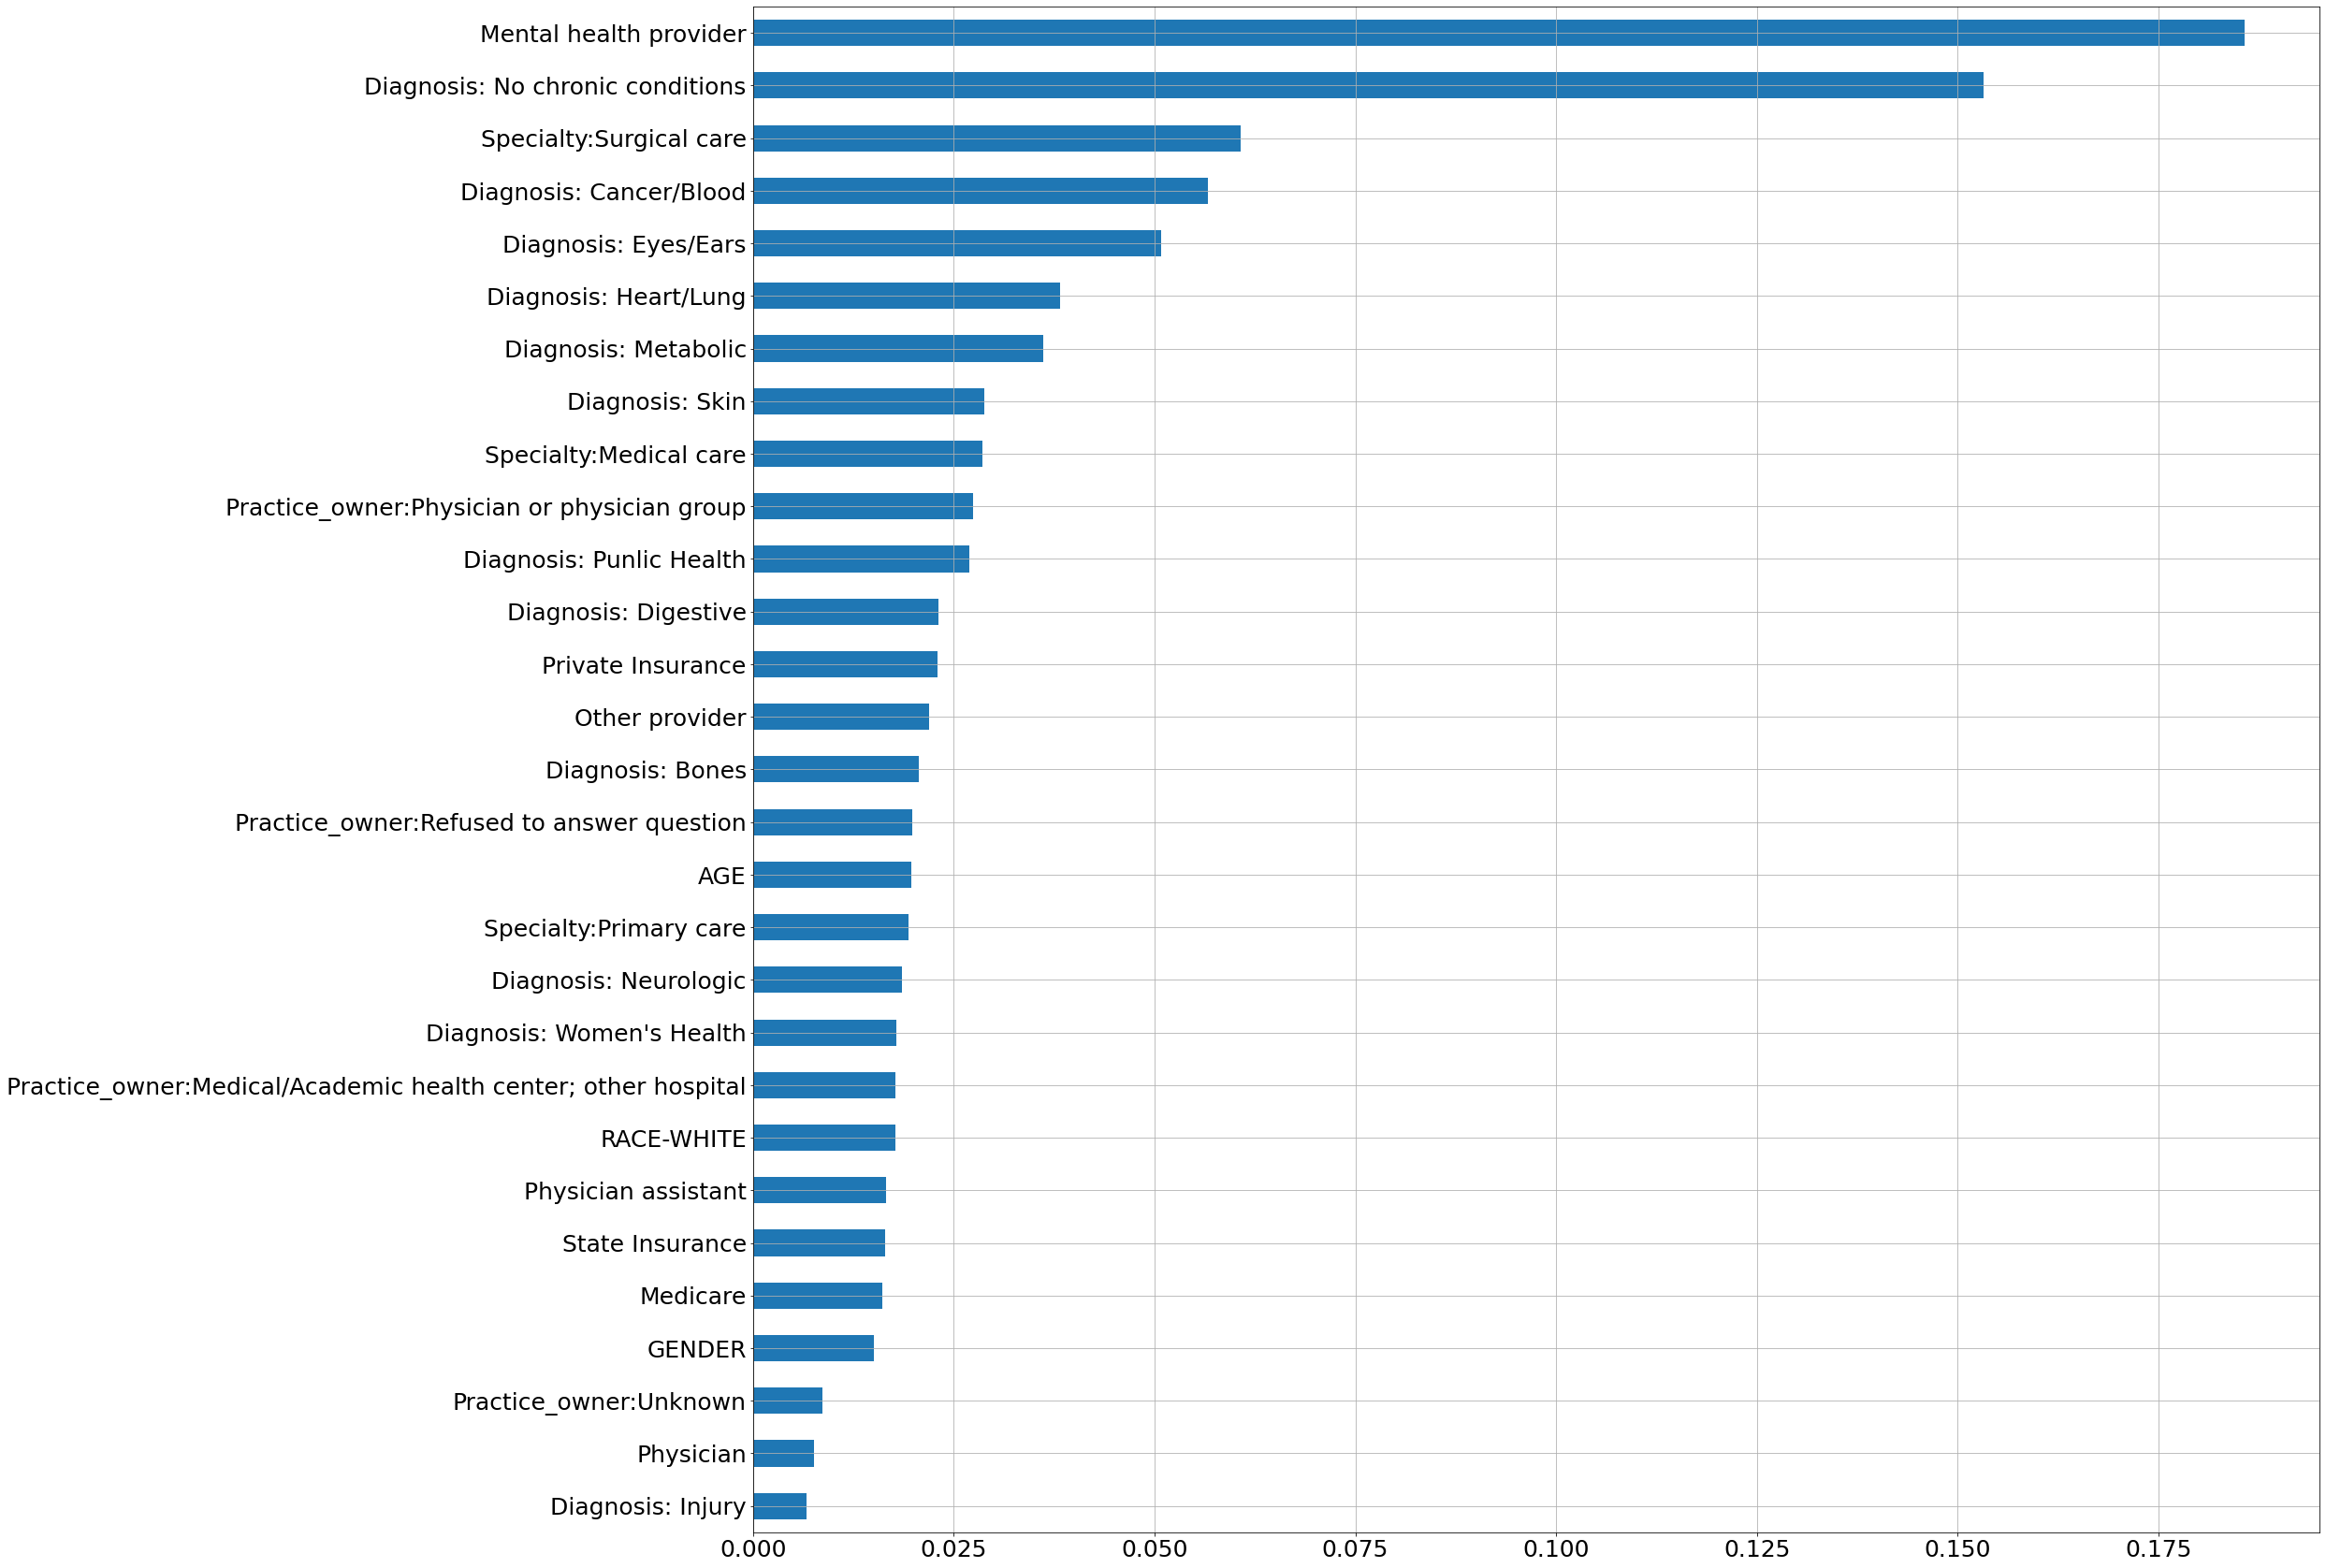

In [22]:
feat_imp(xgb_cl, namcs)

### Confusion matrix for namcs before smote

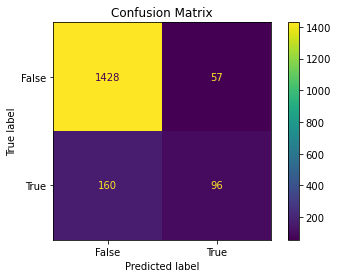

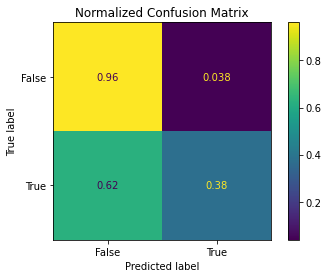

In [23]:
conf_mat(ynam_test, prednam)

### XG BOOST namcs dataset Report before smote

In [24]:
print(classification_report(ynam_test,prednam))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1485
           1       0.63      0.38      0.47       256

    accuracy                           0.88      1741
   macro avg       0.76      0.67      0.70      1741
weighted avg       0.86      0.88      0.86      1741



### PR Curve for namcs before smote

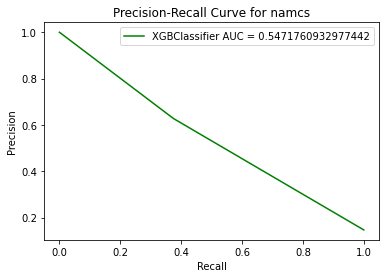

In [25]:
#calculate precision and recall
pr(ynam_test, prednam, 'Precision-Recall Curve for namcs', 'XGBClassifier AUC = ')

### ROC Curve for namcs before smote

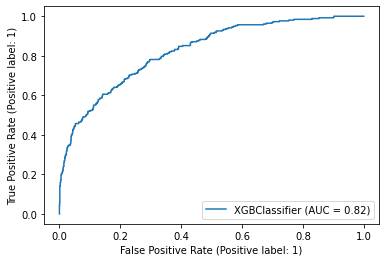

In [26]:
roc(xgb_cl, Xnam_test, ynam_test)

### Applying SMOTE for namcs dataset

In [27]:
sm = SMOTE()
Xnam_train, ynam_train = sm.fit_resample(Xnam_train, ynam_train)
# namcs Fit
xgb_cl.fit(Xnam_train, ynam_train)
modelnam_fit = xgb_cl.fit(Xnam_train, ynam_train)
# Predict
prednam = xgb_cl.predict(Xnam_test)

### Cross Validation Score for namcs after smote

In [28]:
cross(xgb_cl, Xnam_train, ynam_train,'f1_macro')

Mean f1_macro of 0.88 with a standard deviation of 0.08


### Model scores for namcs after smote

In [29]:
skmets(ynam_test, prednam)

{'Accuracy': 0.8363009764503159,
 'Precision': 0.44947735191637633,
 'Sensitivity_recall': 0.50390625,
 'Specificity': 0.8936026936026936,
 'F1_score': 0.47513812154696133}

### Feature Importance for predicting Depression for namcs after smote

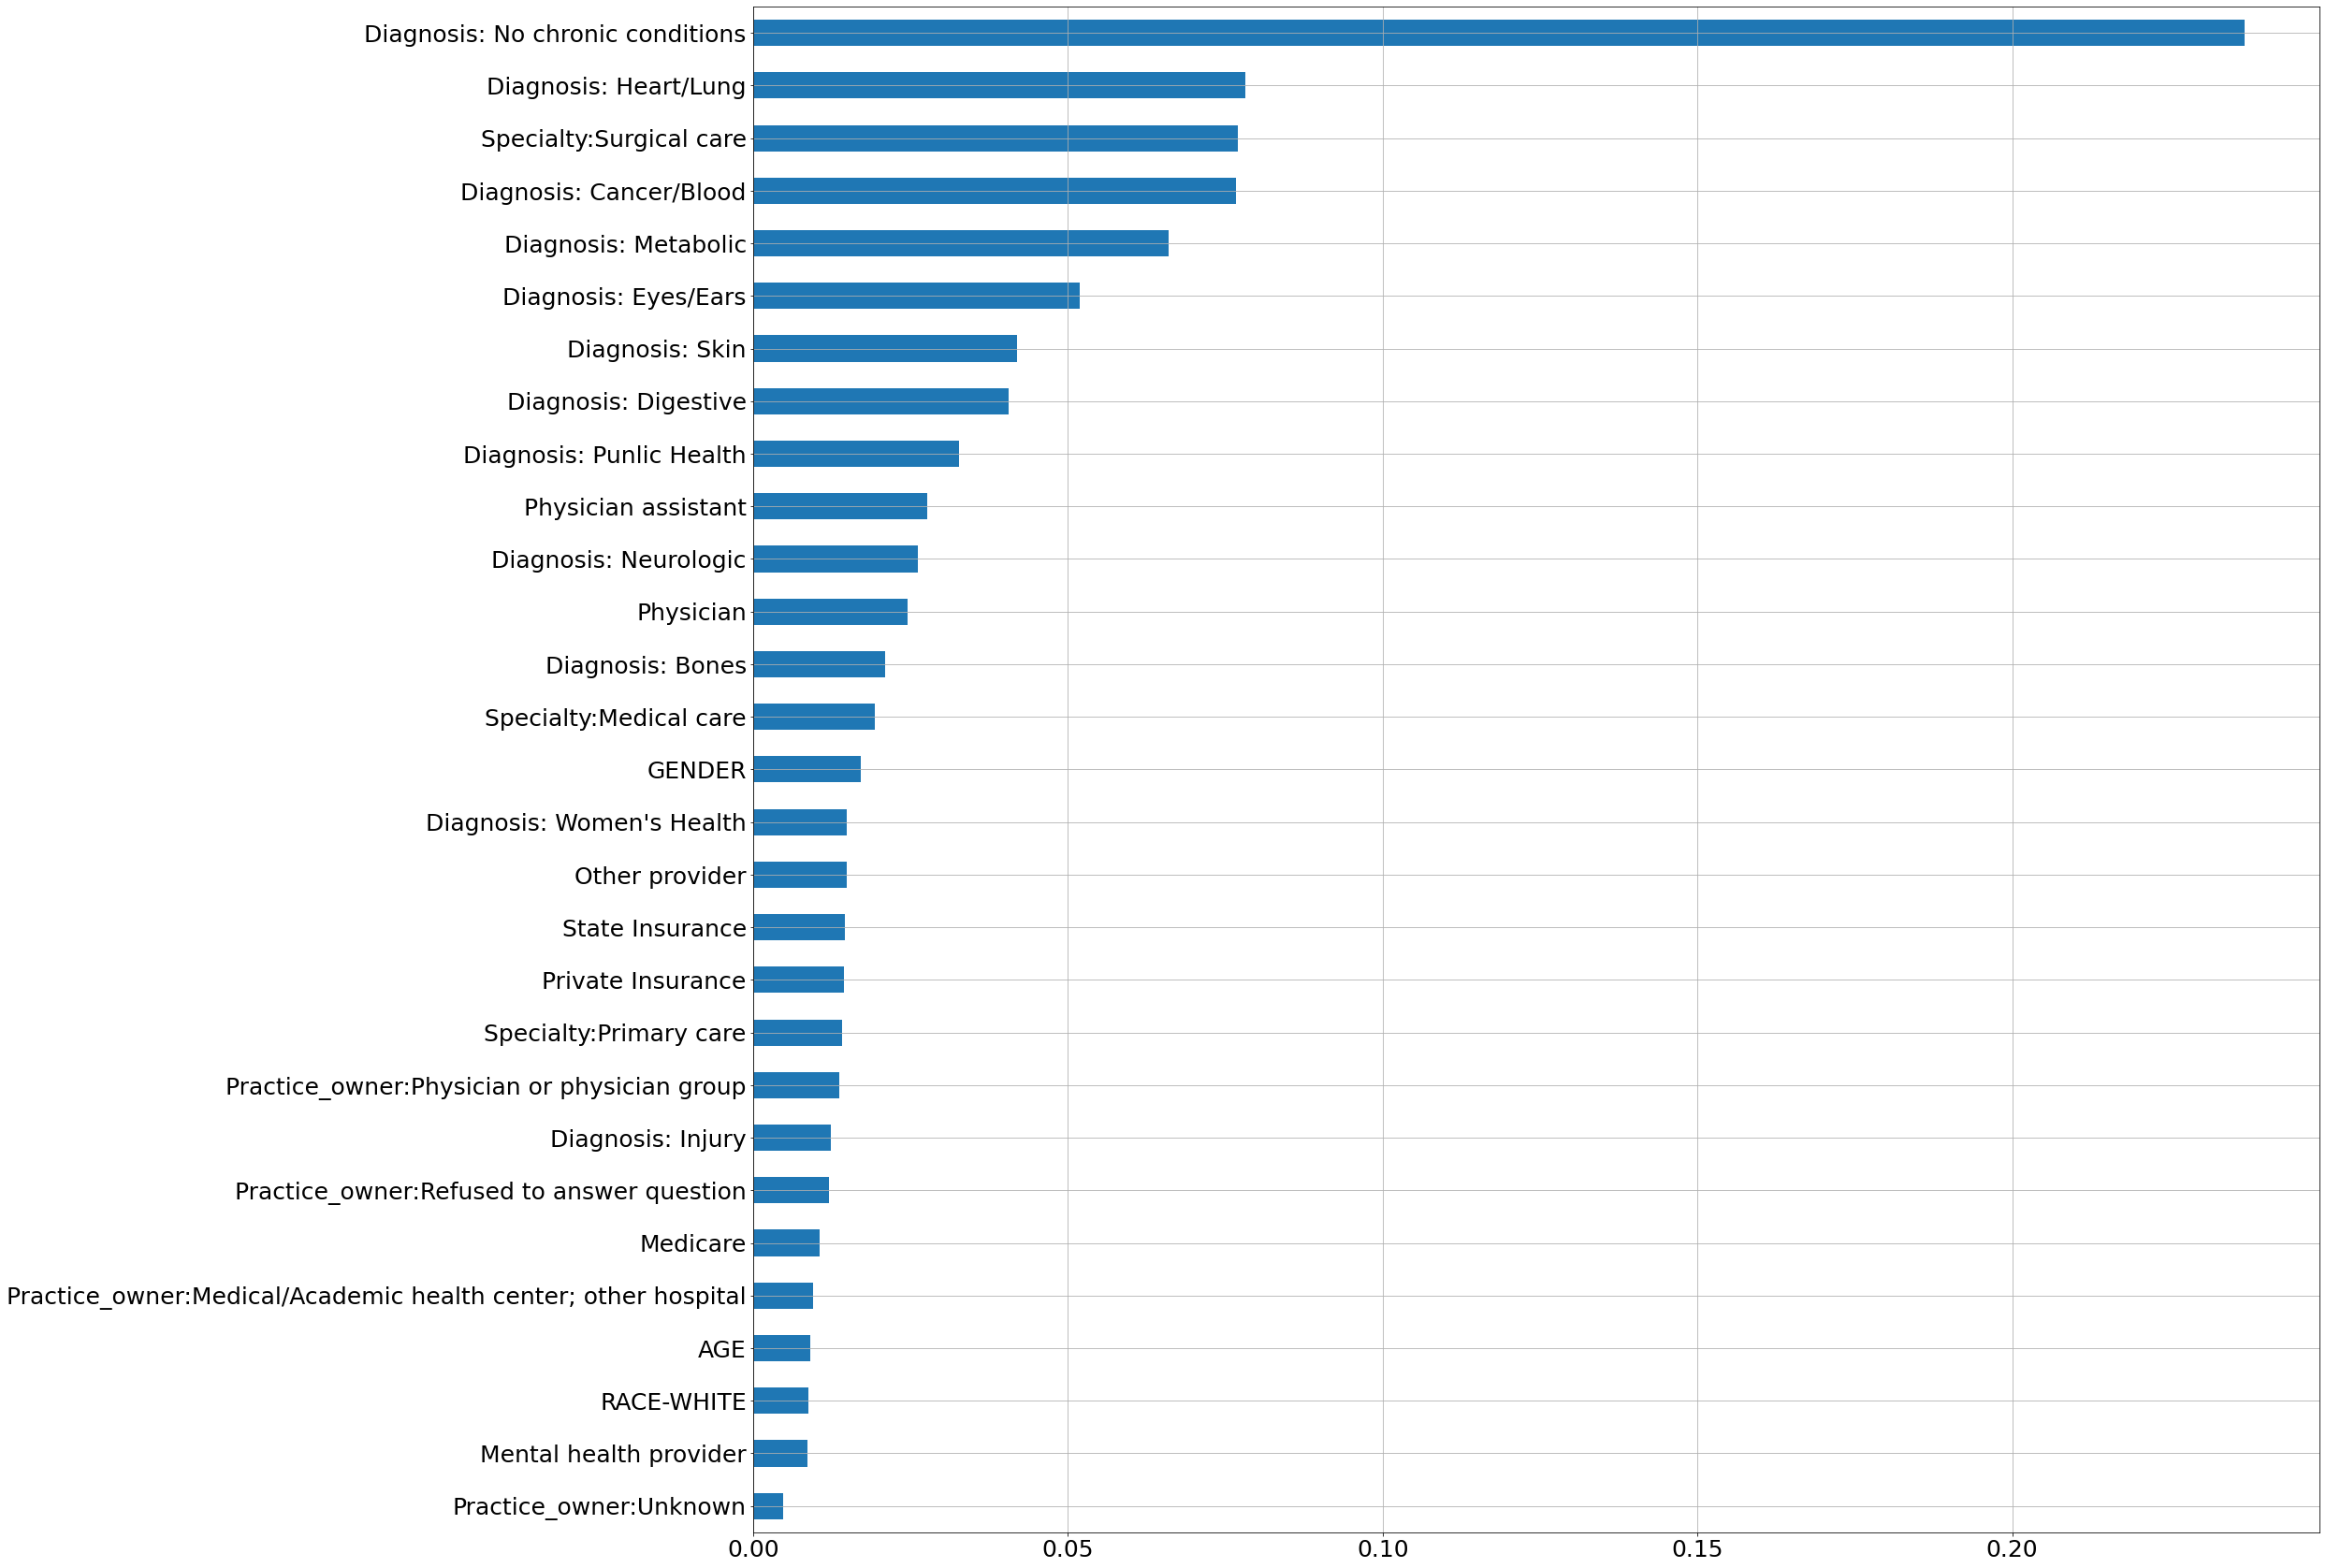

In [30]:
feat_imp(xgb_cl, namcs)

### Confusion matrix for namcs after smote

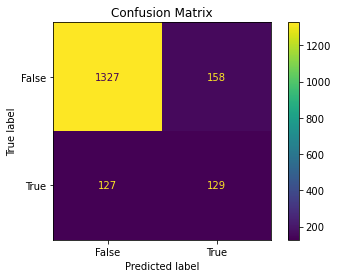

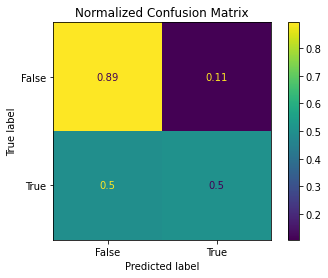

In [31]:
conf_mat(ynam_test, prednam)

### XG BOOST namcs dataset Report after smote

In [32]:
print(classification_report(ynam_test,prednam))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1485
           1       0.45      0.50      0.48       256

    accuracy                           0.84      1741
   macro avg       0.68      0.70      0.69      1741
weighted avg       0.84      0.84      0.84      1741



### PR Curve for namcs after smote

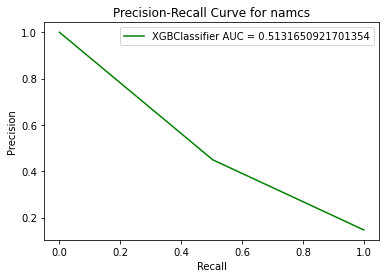

In [33]:
#calculate precision and recall
pr(ynam_test, prednam, 'Precision-Recall Curve for namcs', 'XGBClassifier AUC = ')

### ROC Curve for namcs after smote

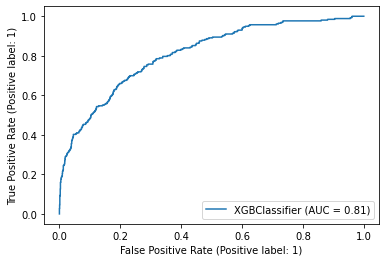

In [34]:
roc(xgb_cl, Xnam_test, ynam_test)

## nhanes dataset

In [35]:
Xnh_train, Xnh_test, ynh_train, ynh_test = train_test_split(X_nh, y_nh, train_size=0.8, random_state=1000000000)

In [36]:
# nhanes Fit
xgb_cl.fit(Xnh_train, ynh_train)
modelnh_fit = xgb_cl.fit(Xnh_train, ynh_train)
# Predict
prednh = xgb_cl.predict(Xnh_test)

### Cross Validation Score for nhanes before smote

In [37]:
cross(xgb_cl, Xnh_train, ynh_train,'f1_macro')

Mean f1_macro of 0.59 with a standard deviation of 0.02


### Model scores for nhanes before smote

In [38]:
skmets(ynh_test, prednh)

{'Accuracy': 0.7320819112627986,
 'Precision': 0.4262295081967213,
 'Sensitivity_recall': 0.27177700348432055,
 'Specificity': 0.8813559322033898,
 'F1_score': 0.33191489361702126}

### Confusion matrix for nhanes before smote

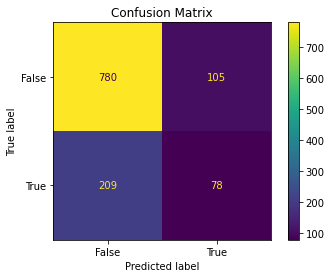

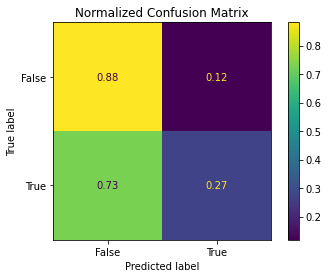

In [39]:
conf_mat(ynh_test, prednh)

### XG BOOST nhanes dataset Report before smote

In [40]:
print(classification_report(ynh_test,prednh))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       885
           1       0.43      0.27      0.33       287

    accuracy                           0.73      1172
   macro avg       0.61      0.58      0.58      1172
weighted avg       0.70      0.73      0.71      1172



### Feature Importance for predicting Depression for nhanes before smote

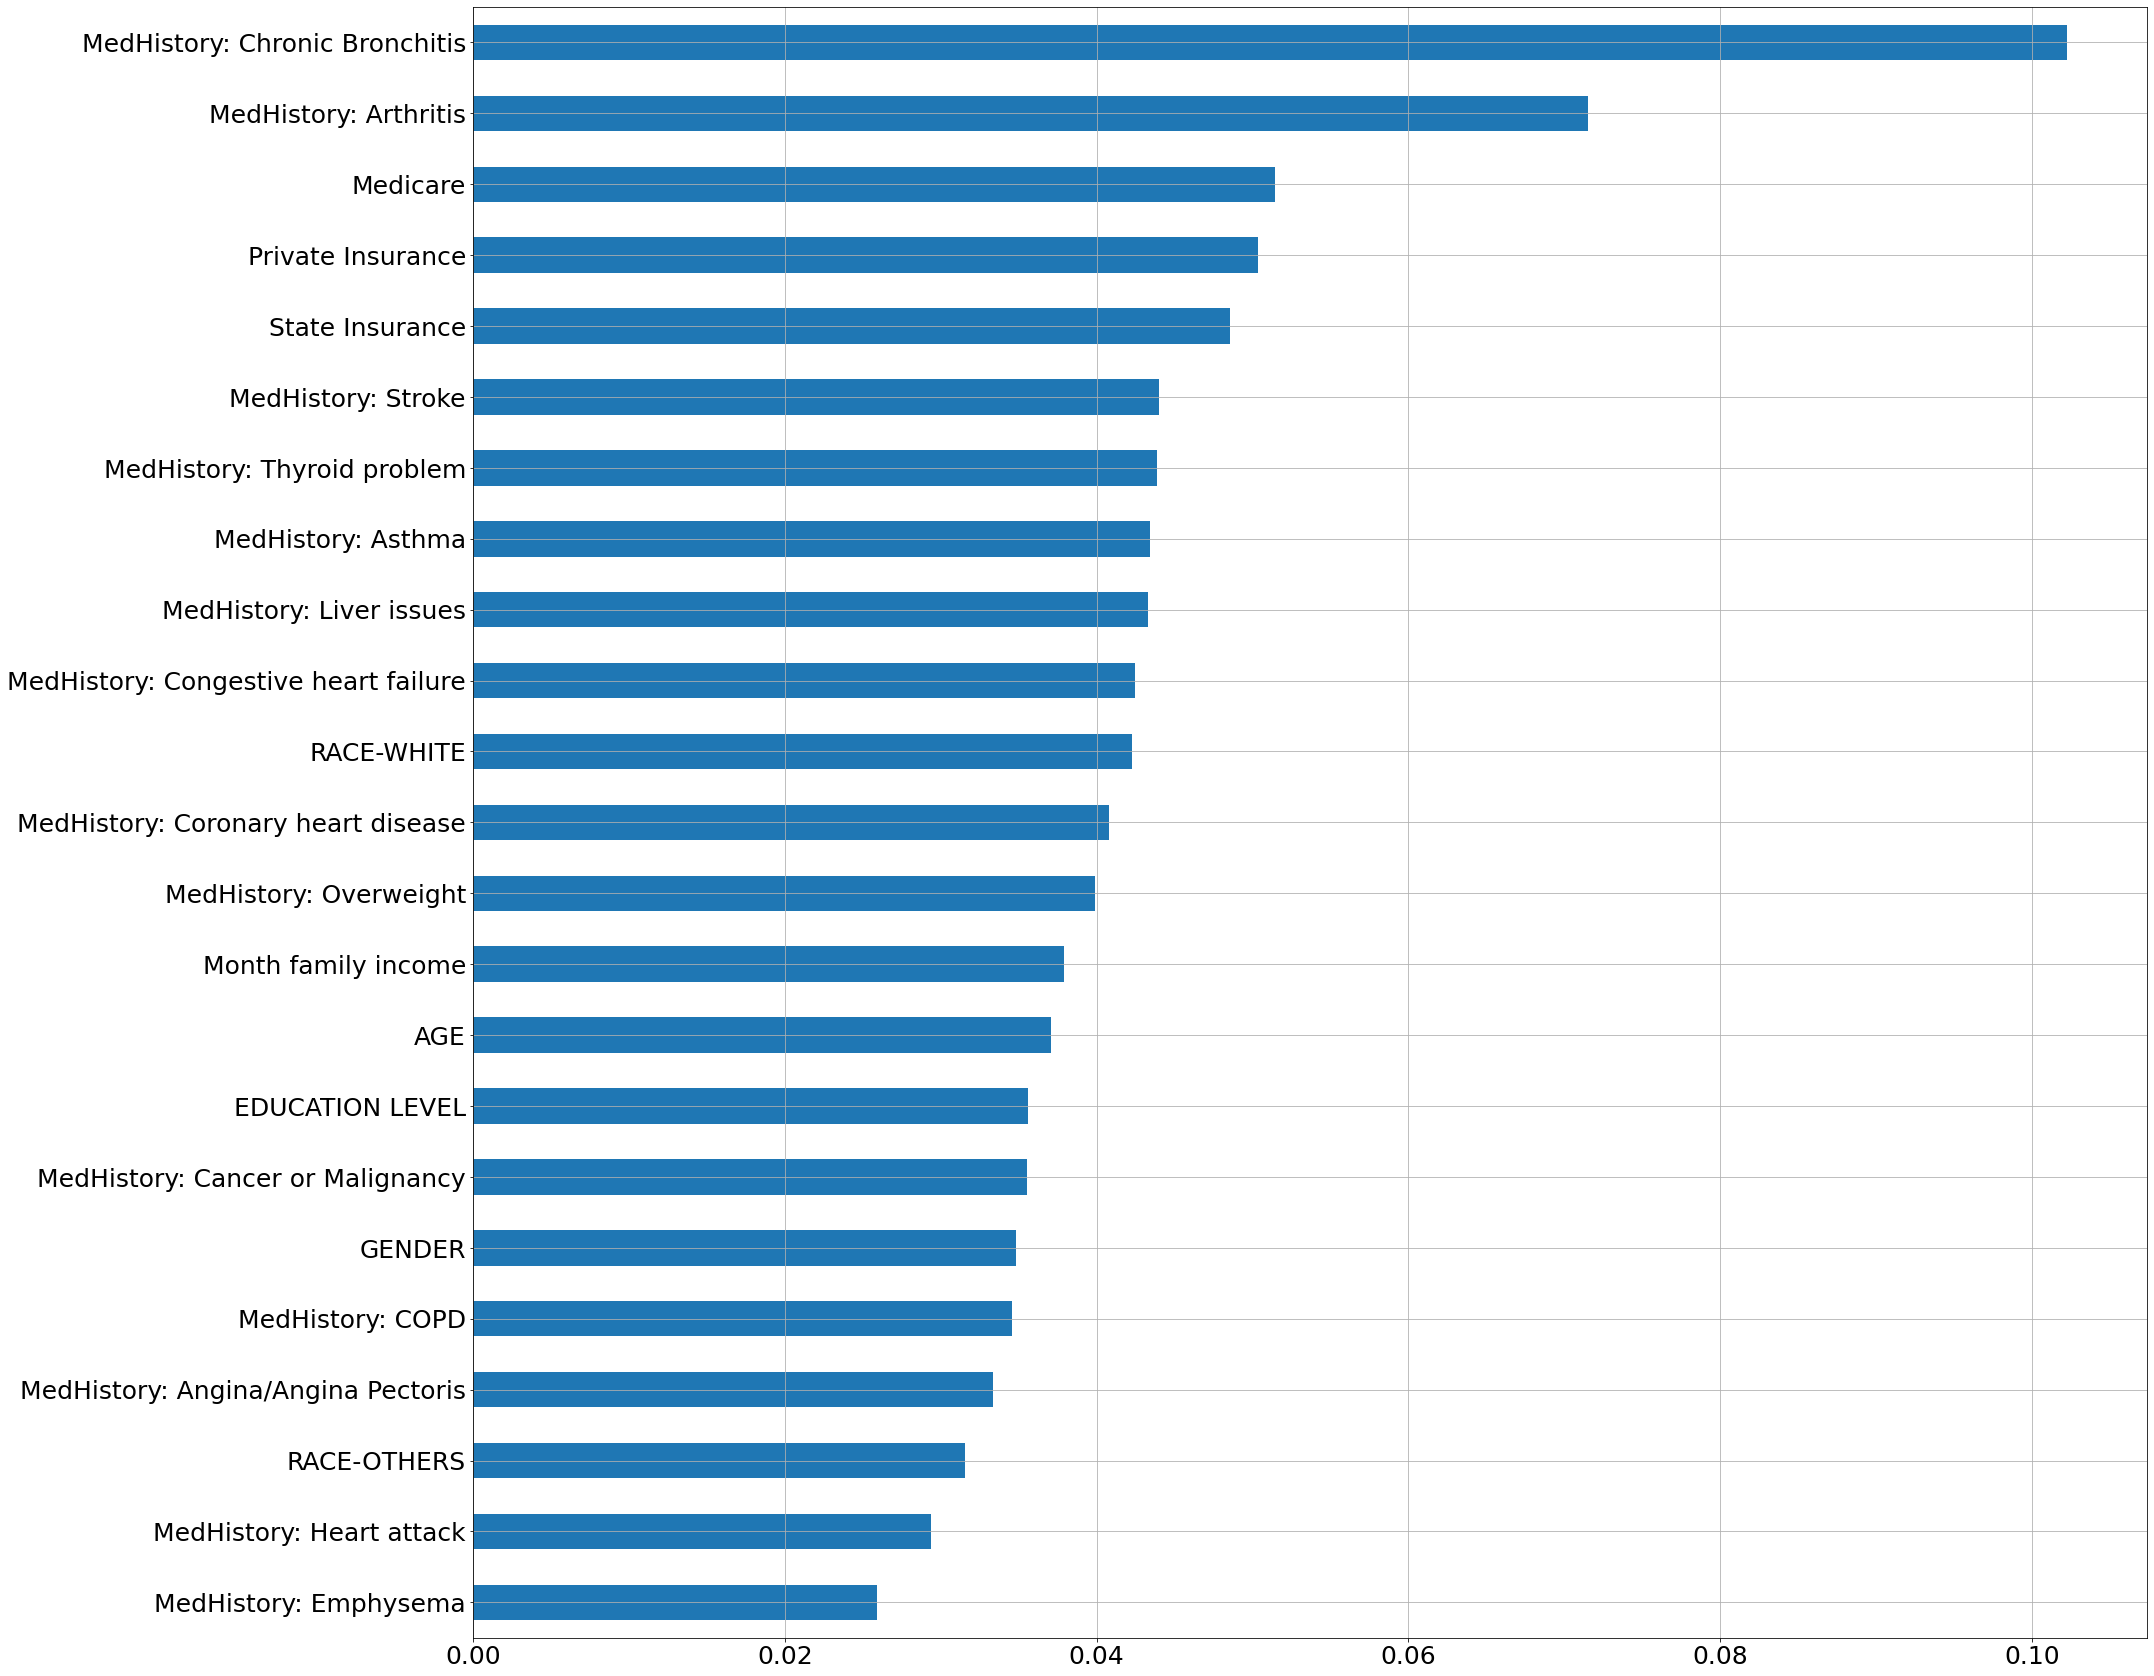

In [41]:
feat_imp(xgb_cl, nhanes)

### PR Curve for nhanes before smote

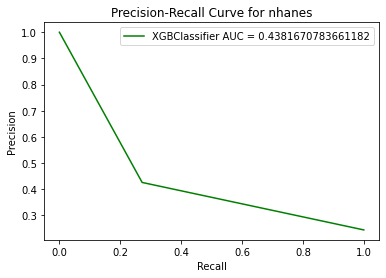

In [42]:
#calculate precision and recall
pr(ynh_test, prednh, 'Precision-Recall Curve for nhanes', 'XGBClassifier AUC = ')

### ROC Curve for nhanes before smote

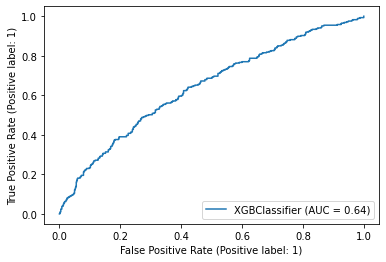

In [43]:
roc(xgb_cl, Xnh_test, ynh_test)

### Applying SMOTE for nhanes dataset

In [44]:
sm = SMOTE()
Xnh_train, ynh_train = sm.fit_resample(Xnh_train, ynh_train)
# nhanes Fit
xgb_cl.fit(Xnh_train, ynh_train)
modelnh_fit = xgb_cl.fit(Xnh_train, ynh_train)
# Predict
prednh = xgb_cl.predict(Xnh_test)

### Cross Validation Score for nhanes after smote

In [45]:
cross(xgb_cl, Xnh_train, ynh_train,'f1_macro')

Mean f1_macro of 0.76 with a standard deviation of 0.07


### Model scores for nhanes after smote

In [46]:
skmets(ynh_test, prednh)

{'Accuracy': 0.6399317406143344,
 'Precision': 0.3209549071618037,
 'Sensitivity_recall': 0.42160278745644597,
 'Specificity': 0.7107344632768362,
 'F1_score': 0.36445783132530113}

### Confusion matrix for nhanes after smote

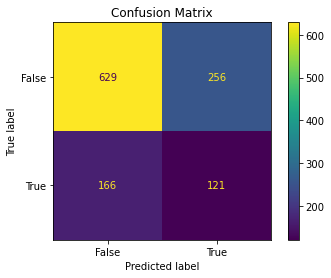

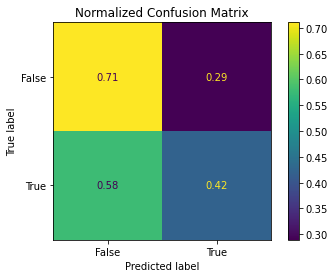

In [47]:
conf_mat(ynh_test, prednh)

### XG BOOST nhanes dataset Report after smote

In [48]:
print(classification_report(ynh_test,prednh))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       885
           1       0.32      0.42      0.36       287

    accuracy                           0.64      1172
   macro avg       0.56      0.57      0.56      1172
weighted avg       0.68      0.64      0.65      1172



### Feature Importance for predicting Depression for nhanes after smote

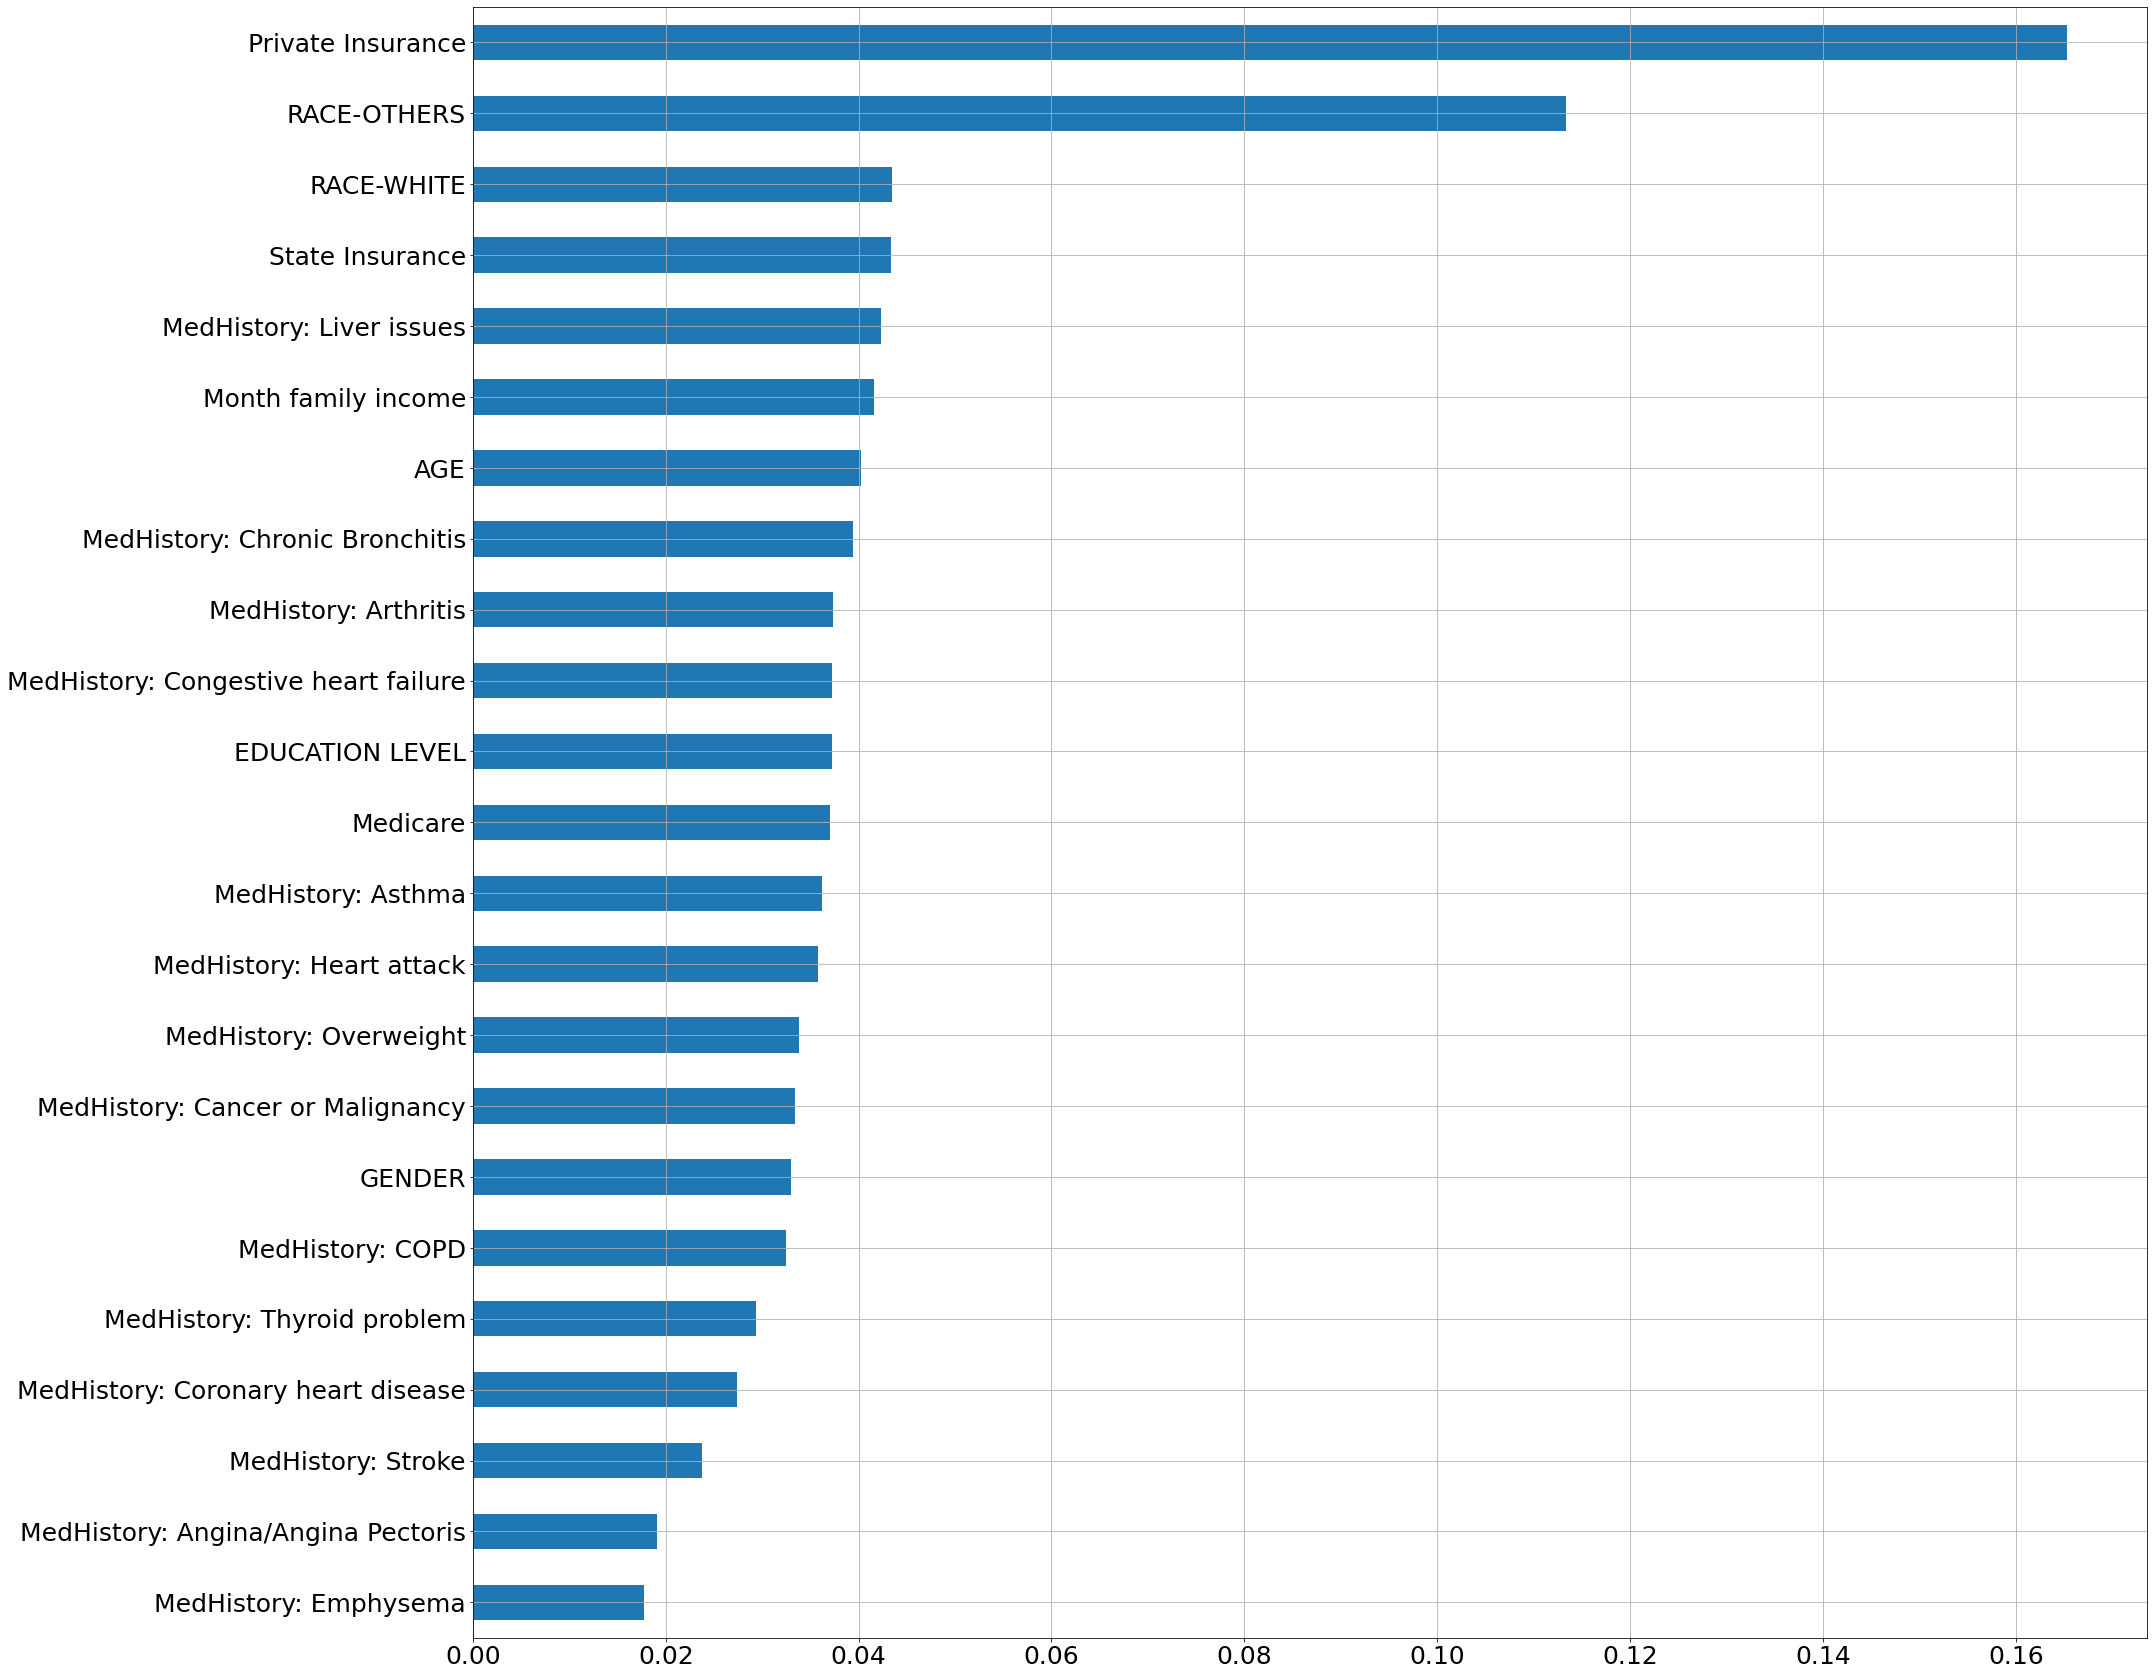

In [49]:
feat_imp(xgb_cl, nhanes)

### PR Curve for nhanes after smote

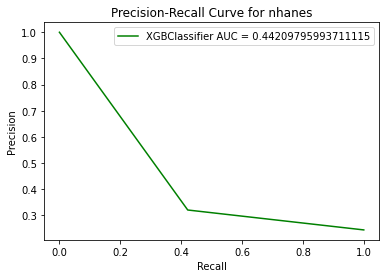

In [50]:
#calculate precision and recall
pr(ynh_test, prednh, 'Precision-Recall Curve for nhanes', 'XGBClassifier AUC = ')

### ROC Curve for nhanes after smote

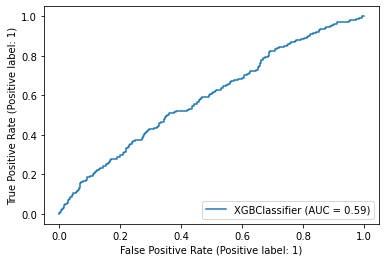

In [51]:
roc(xgb_cl, Xnh_test, ynh_test)

# RANDOM FOREST CLASSIFIER

In [52]:
clf = RandomForestClassifier(criterion = "gini", random_state=1)

## namcs dataset

In [53]:
Xnam_train, Xnam_test, ynam_train, ynam_test = train_test_split(X_nam, y_nam, train_size=0.8, random_state=1000000000)

In [54]:
# namcs
clf.fit(Xnam_train, ynam_train)
prednam = clf.predict(Xnam_test)

### Cross Validation for namcs before smote

In [55]:
cross(clf, Xnam_train, ynam_train,'f1_macro')

Mean f1_macro of 0.67 with a standard deviation of 0.02


### Model scores for namcs before smote

In [56]:
skmets(ynam_test, prednam)

{'Accuracy': 0.8575531303848363,
 'Precision': 0.5204081632653061,
 'Sensitivity_recall': 0.3984375,
 'Specificity': 0.9367003367003367,
 'F1_score': 0.4513274336283186}

### Feature Importance for predicting Depression for namcs before smote

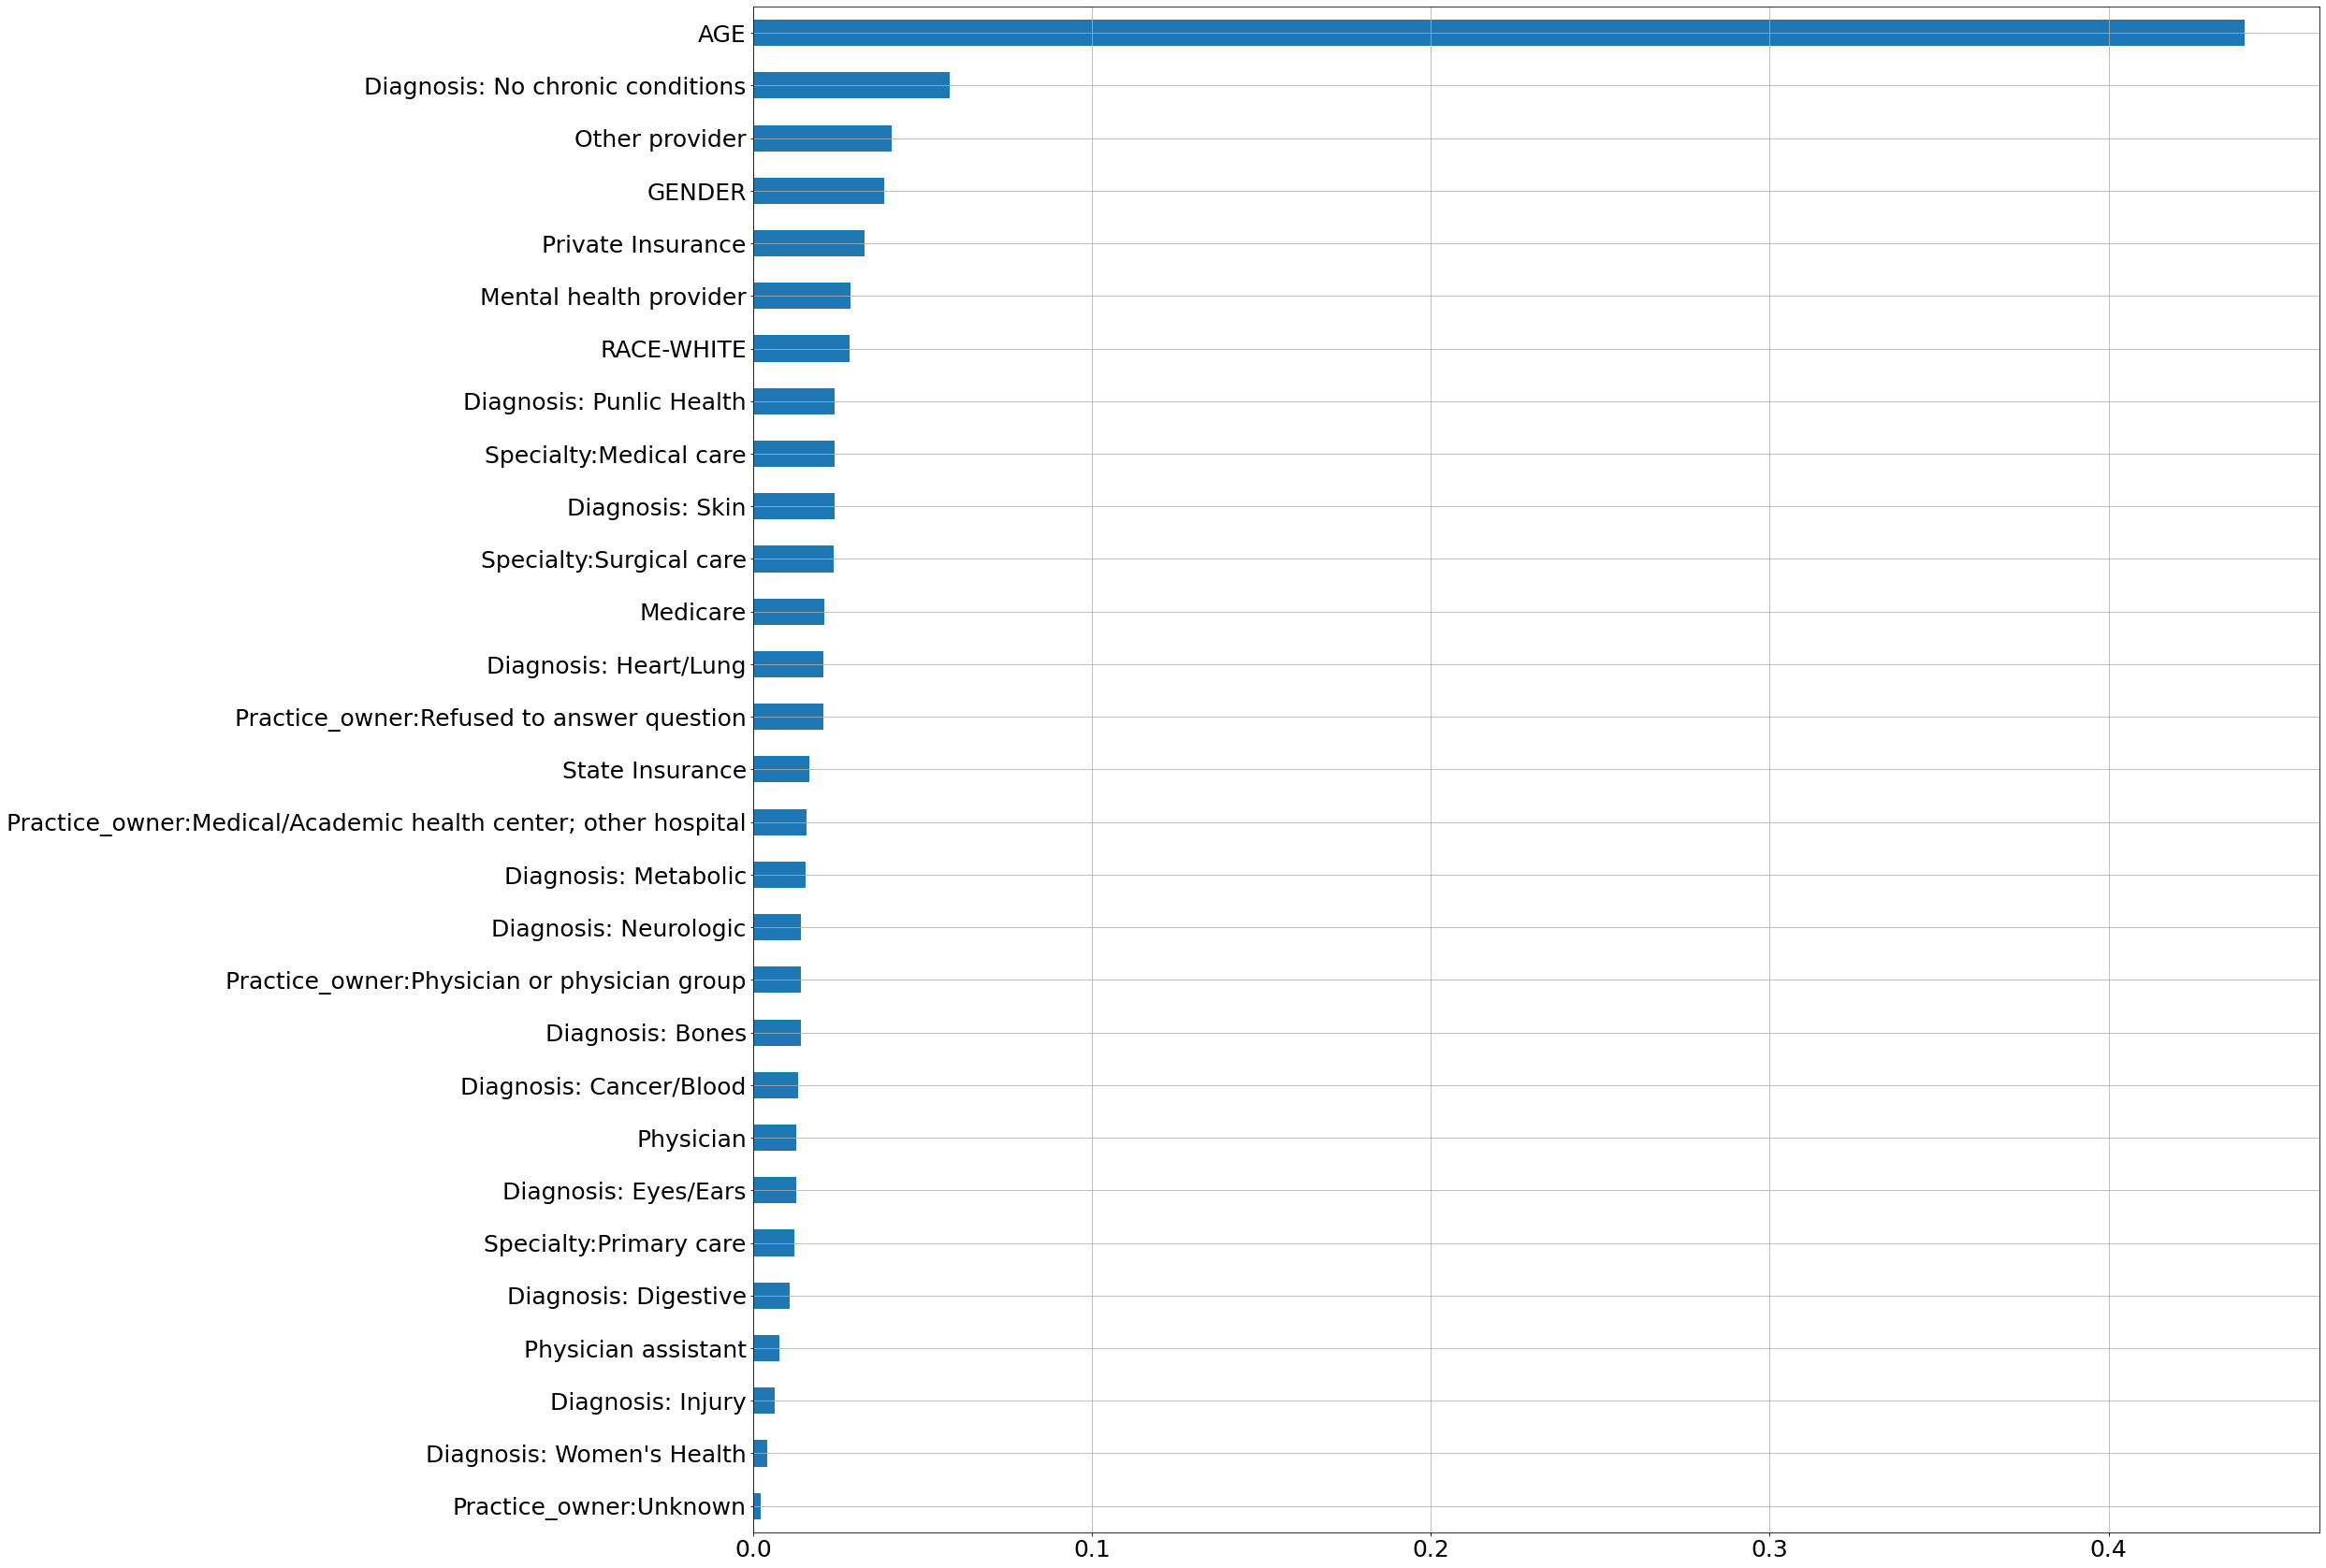

In [57]:
feat_imp(clf, namcs)

### Confusion matrix for namcs before smote

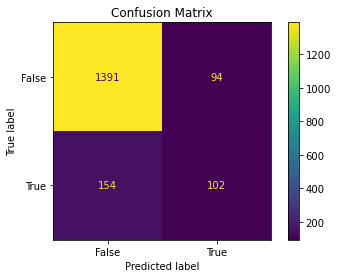

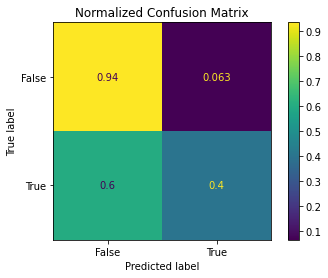

In [58]:
conf_mat(ynam_test, prednam)

### RANDOM FOREST namcs dataset Report smote

In [59]:
print(classification_report(ynam_test,prednam))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1485
           1       0.52      0.40      0.45       256

    accuracy                           0.86      1741
   macro avg       0.71      0.67      0.68      1741
weighted avg       0.84      0.86      0.85      1741



### PR Curve for namcs before smote

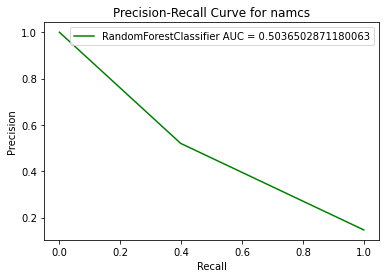

In [60]:
#calculate precision and recall
pr(ynam_test, prednam, 'Precision-Recall Curve for namcs', 'RandomForestClassifier AUC = ')

### ROC Curve for namcs before smote

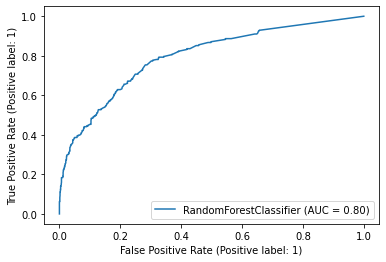

In [61]:
roc(clf, Xnam_test, ynam_test)

### Applying SMOTE for namcs dataset

In [62]:
sm = SMOTE()
Xnh_train, ynh_train = sm.fit_resample(Xnh_train, ynh_train)
# namcs
clf.fit(Xnam_train, ynam_train)
prednam = clf.predict(Xnam_test)

### Cross Validation for namcs after smote

In [63]:
cross(clf, Xnam_train, ynam_train,'f1_macro')

Mean f1_macro of 0.67 with a standard deviation of 0.02


### Model scores for namcs after smote

In [64]:
skmets(ynam_test, prednam)

{'Accuracy': 0.8575531303848363,
 'Precision': 0.5204081632653061,
 'Sensitivity_recall': 0.3984375,
 'Specificity': 0.9367003367003367,
 'F1_score': 0.4513274336283186}

### Feature Importance for predicting Depression for namcs after smote

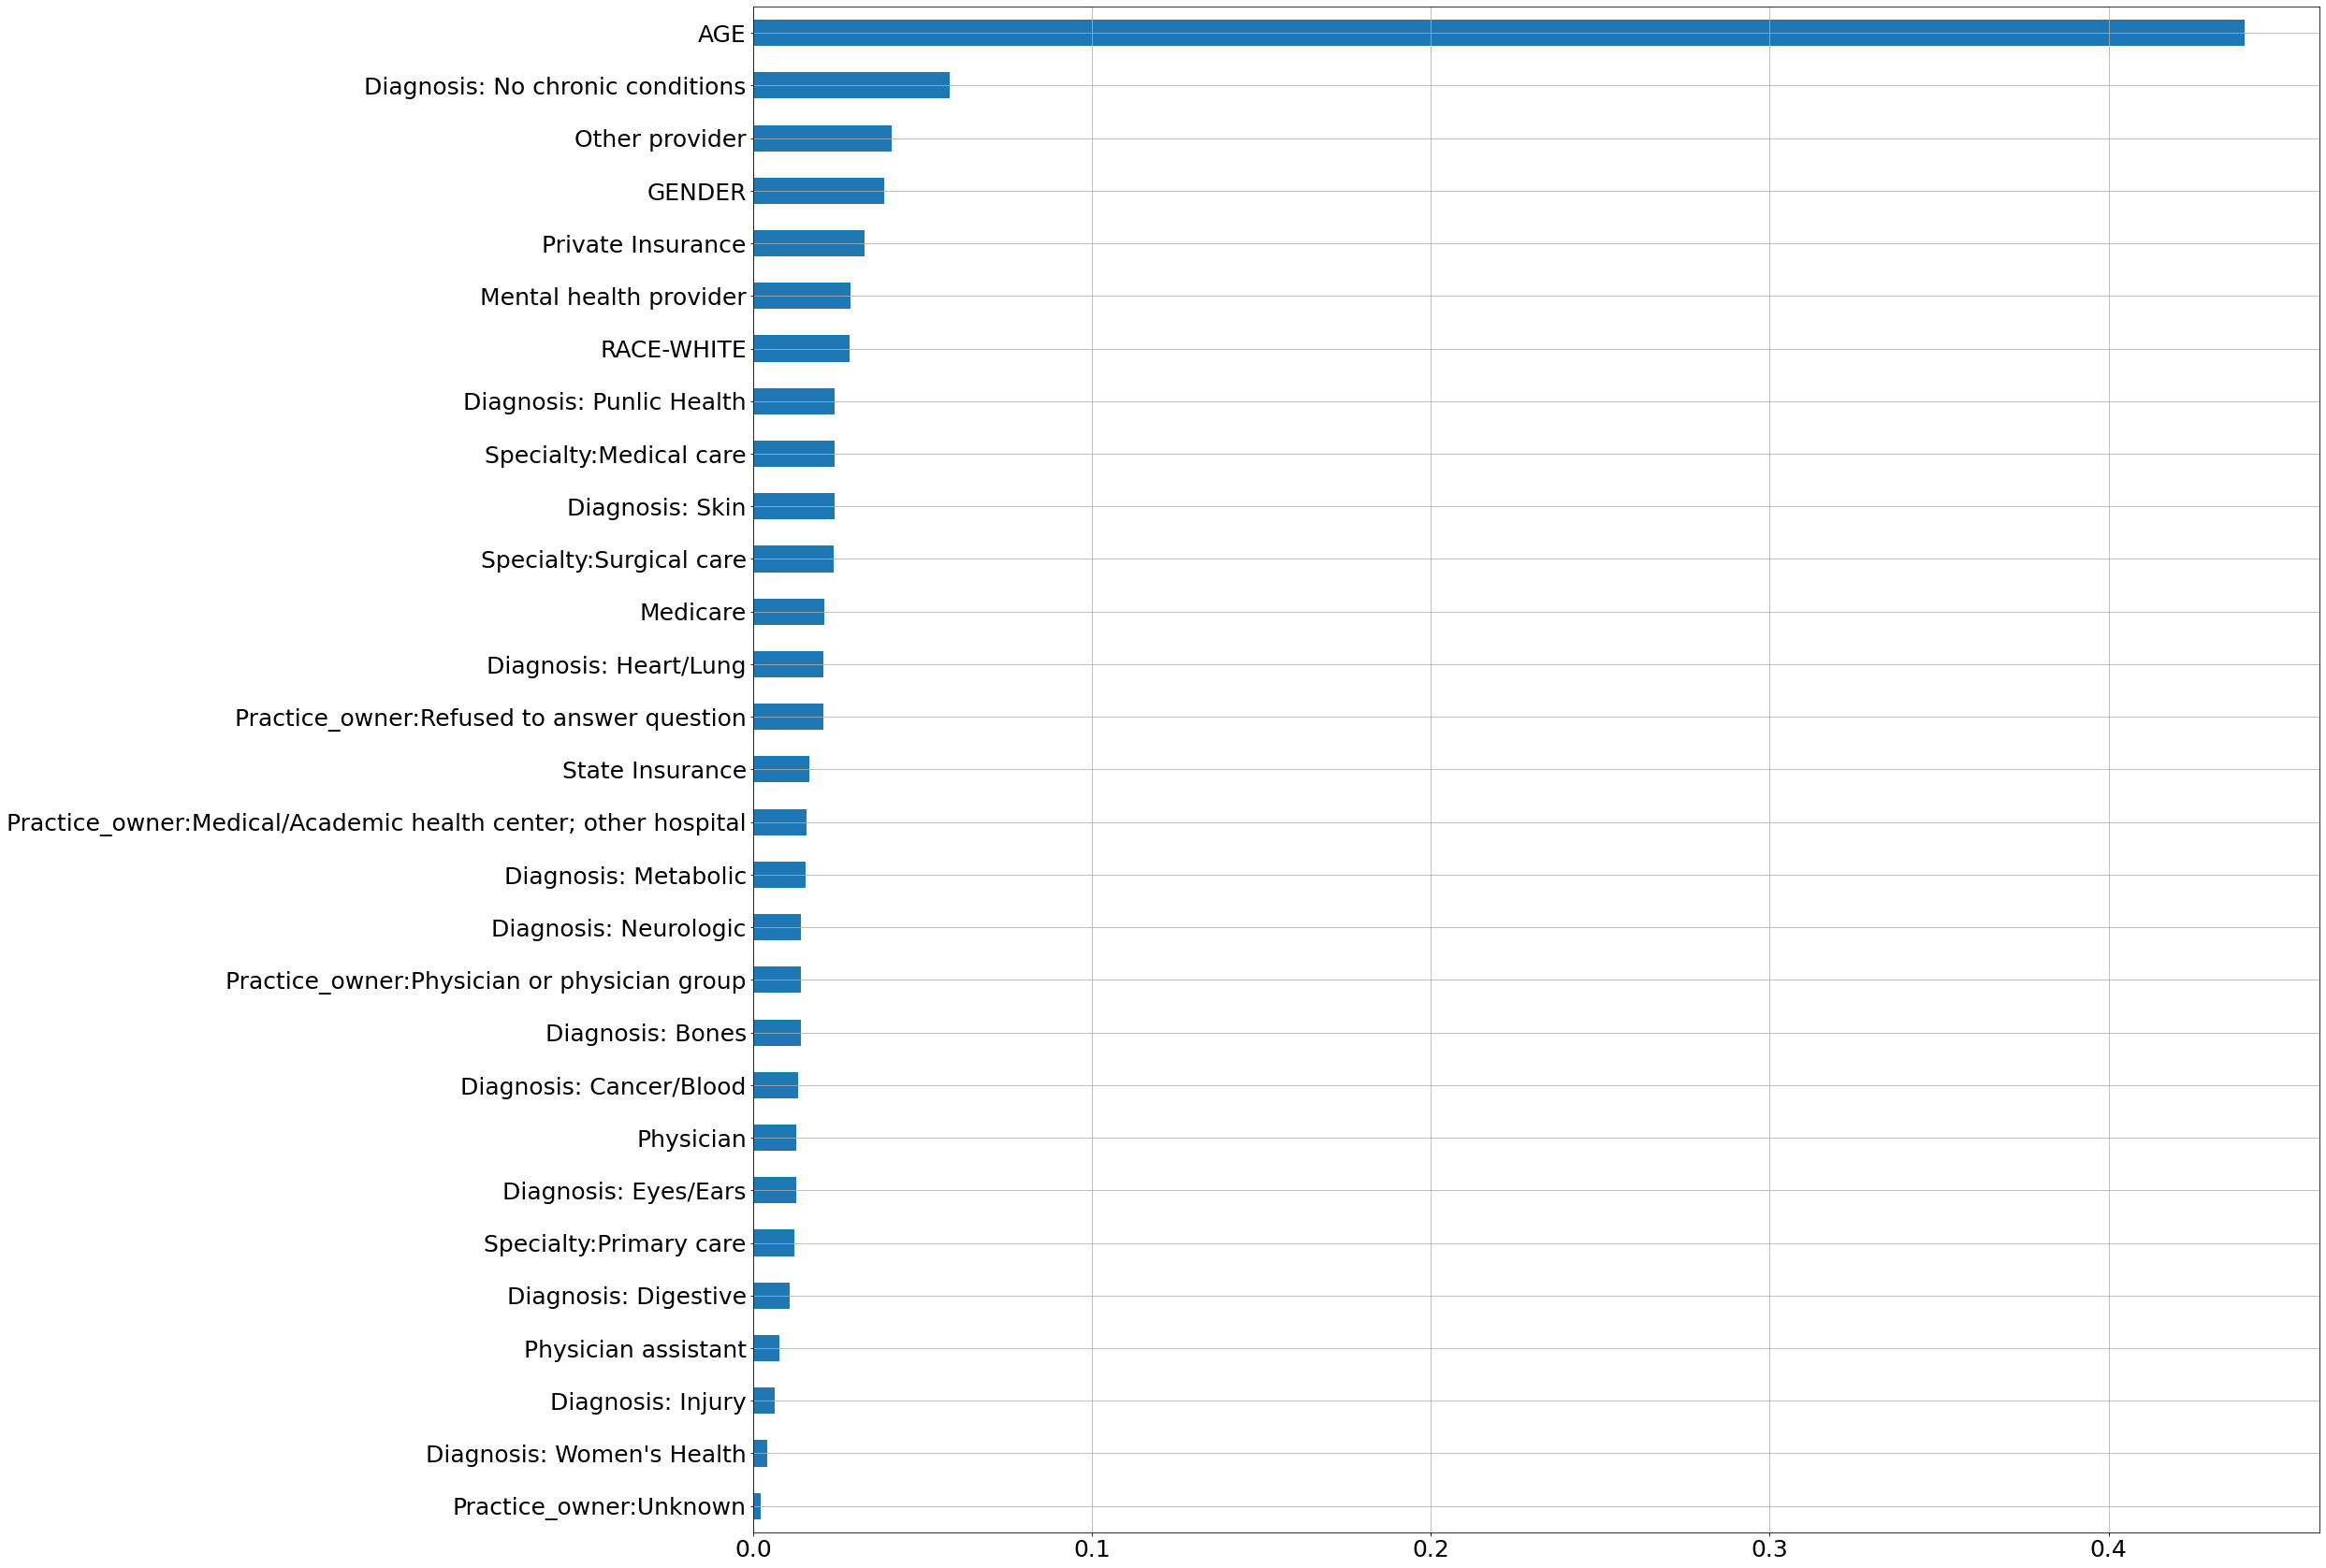

In [65]:
feat_imp(clf, namcs)

### Confusion matrix for namcs after smote

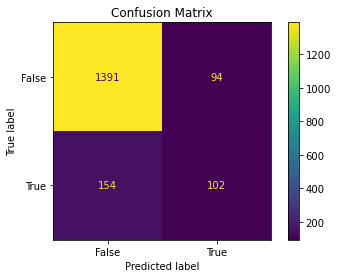

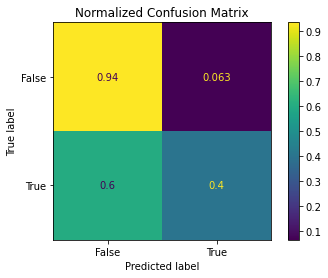

In [66]:
conf_mat(ynam_test, prednam)

### RANDOM FOREST namcs dataset Report after smote

In [67]:
print(classification_report(ynam_test,prednam))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1485
           1       0.52      0.40      0.45       256

    accuracy                           0.86      1741
   macro avg       0.71      0.67      0.68      1741
weighted avg       0.84      0.86      0.85      1741



### PR Curve for namcs after smote

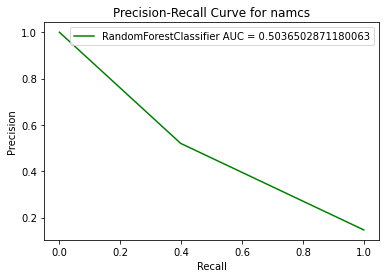

In [68]:
#calculate precision and recall
pr(ynam_test, prednam, 'Precision-Recall Curve for namcs', 'RandomForestClassifier AUC = ')

### ROC Curve for namcs after smote

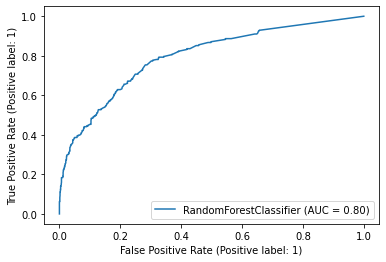

In [69]:
roc(clf, Xnam_test, ynam_test)

## nhanes dataset

In [70]:
Xnh_train, Xnh_test, ynh_train, ynh_test = train_test_split(X_nh, y_nh, train_size=0.8, random_state=1000000000)

In [71]:
# nhanes
clf.fit(Xnh_train, ynh_train)
prednh = clf.predict(Xnh_test)

### Cross Validation for nhanes before smote

In [72]:
cross(clf, Xnh_train, ynh_train,'f1_macro')

Mean f1_macro of 0.57 with a standard deviation of 0.01


### Model scores for nhanes before smote

In [73]:
skmets(ynh_test, prednh)

{'Accuracy': 0.7244027303754266,
 'Precision': 0.3783783783783784,
 'Sensitivity_recall': 0.1951219512195122,
 'Specificity': 0.896045197740113,
 'F1_score': 0.2574712643678161}

### Feature Importance for predicting Depression for nhanes before smote

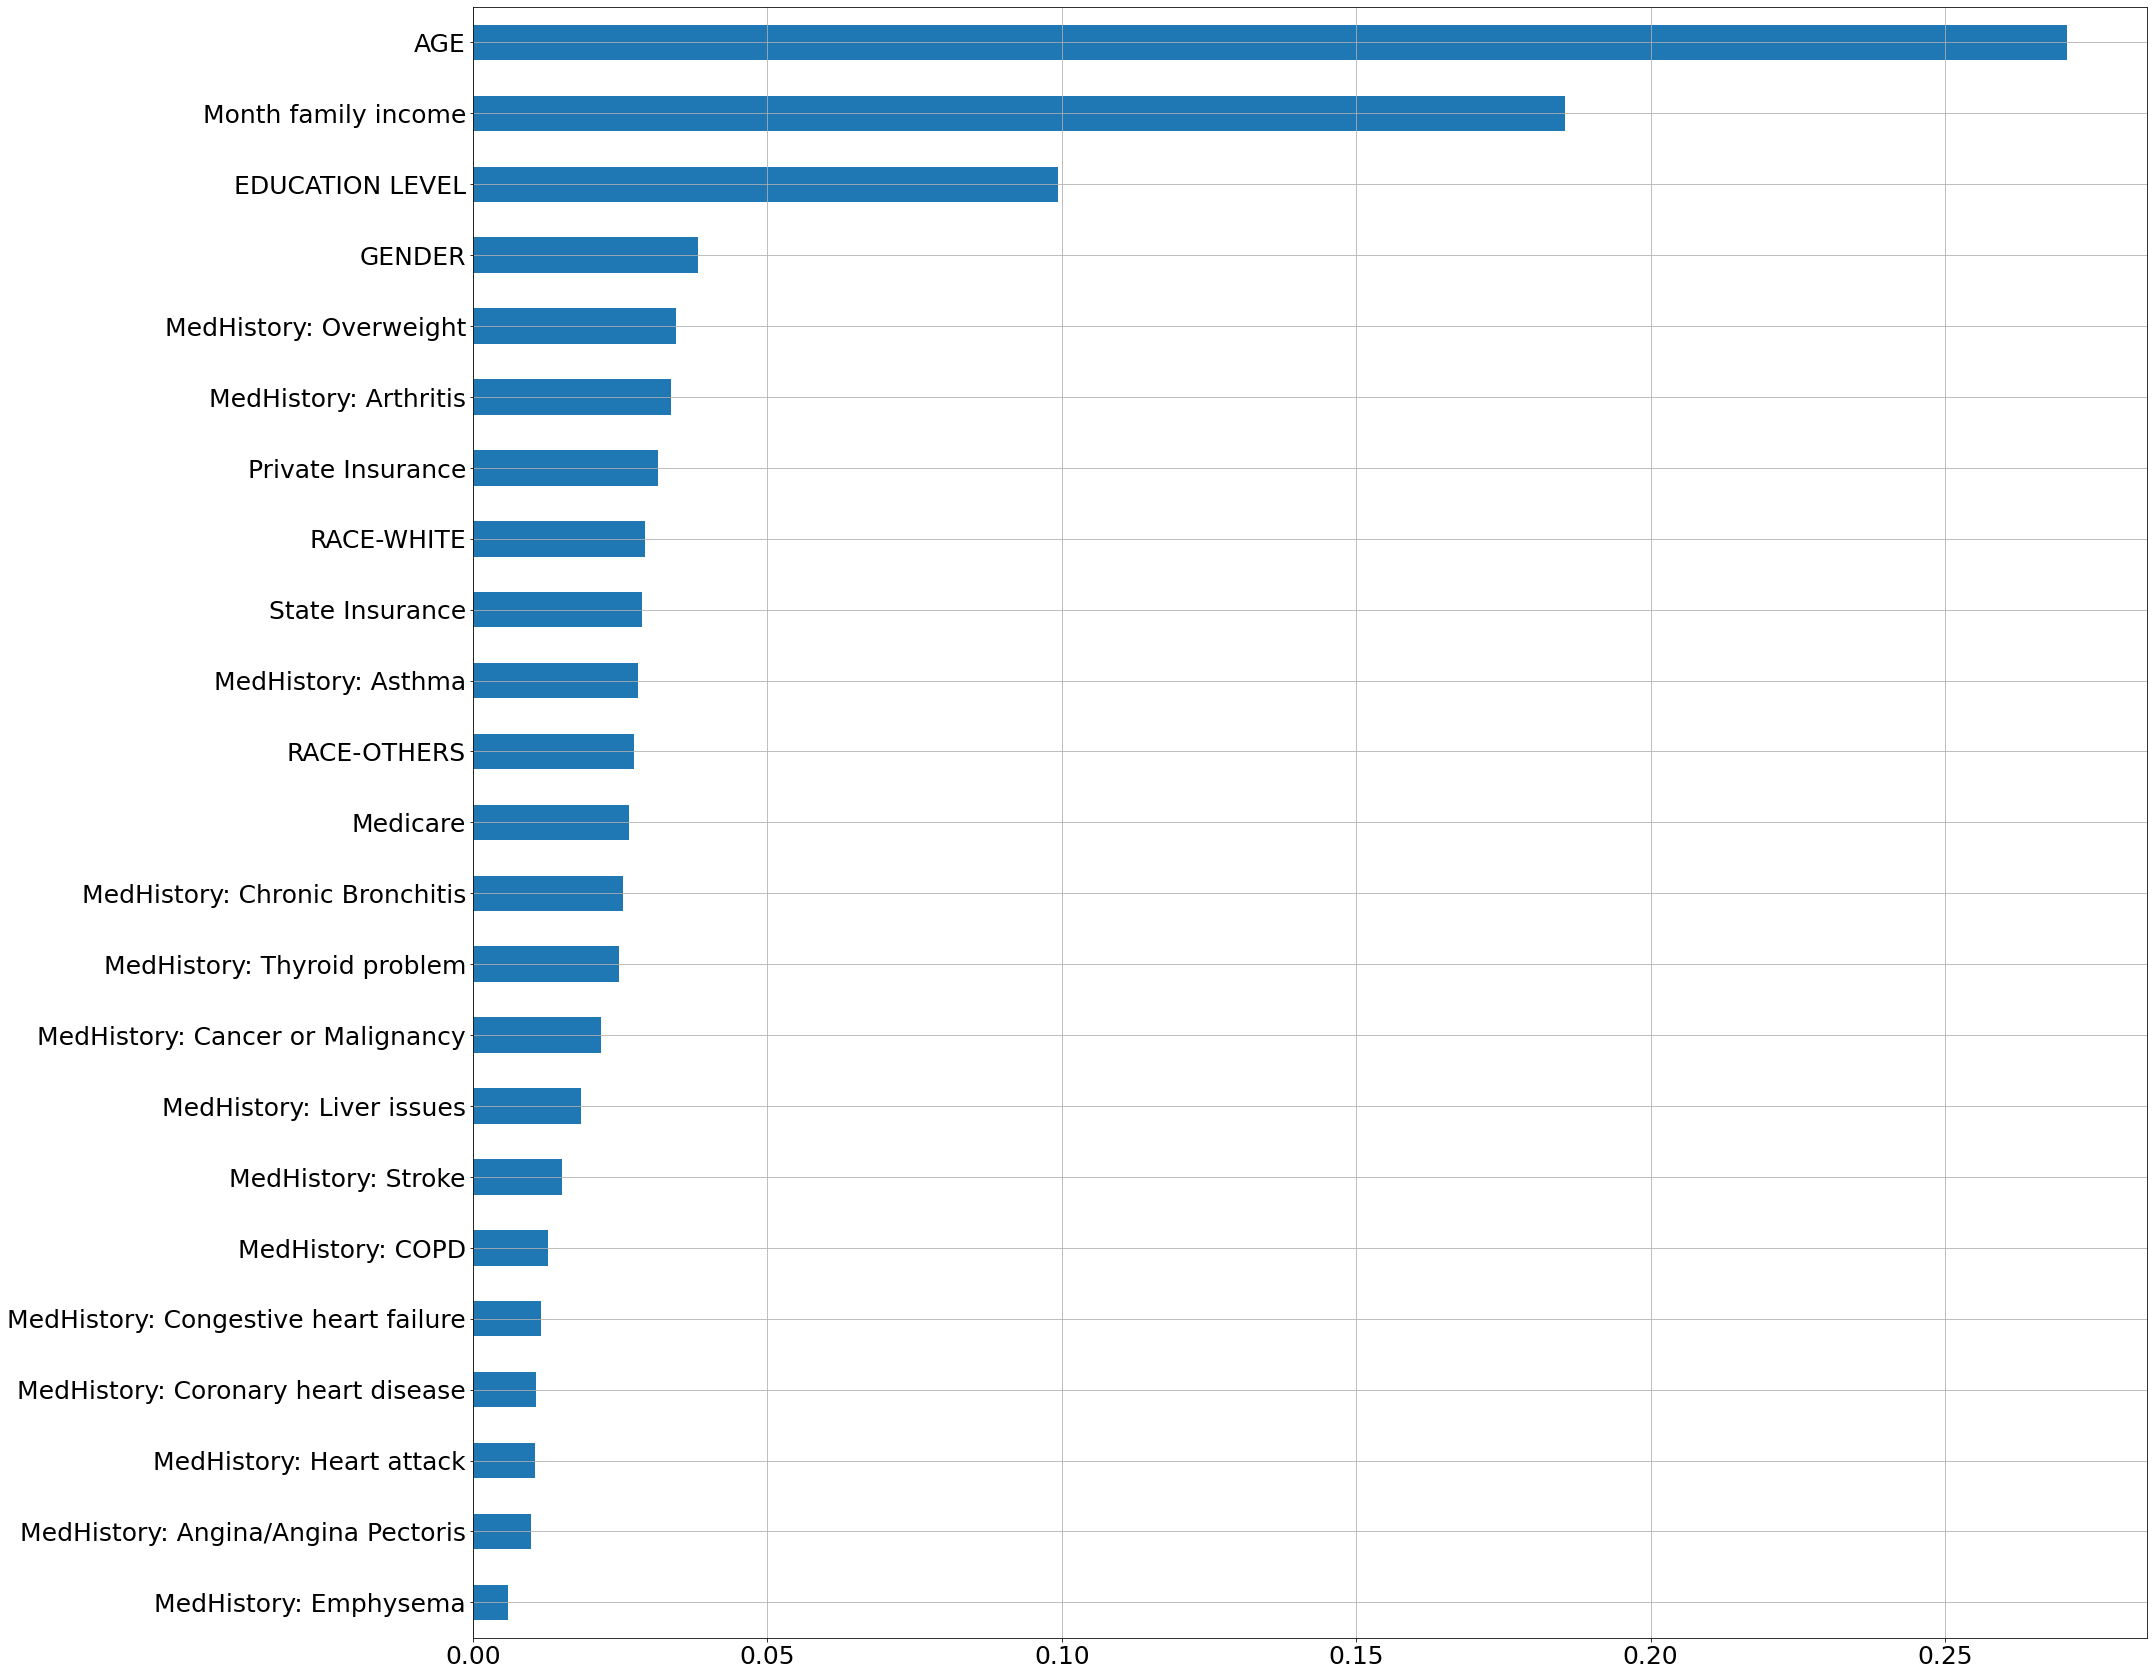

In [74]:
feat_imp(clf, nhanes)

### Confusion matrix for nhanes before smote

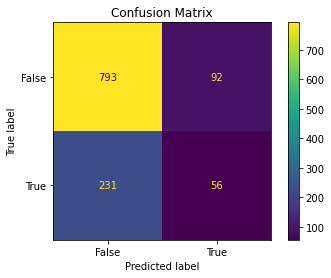

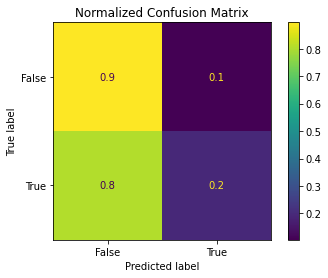

In [75]:
conf_mat(ynh_test, prednh)

### RANDOM FOREST nhanes dataset Report before smote

In [76]:
print(classification_report(ynh_test, prednh))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       885
           1       0.38      0.20      0.26       287

    accuracy                           0.72      1172
   macro avg       0.58      0.55      0.54      1172
weighted avg       0.68      0.72      0.69      1172



### PR Curve for nhanes before smote

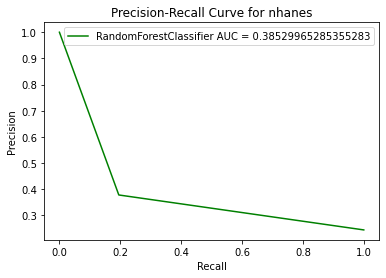

In [77]:
#calculate precision and recall
pr(ynh_test, prednh, 'Precision-Recall Curve for nhanes', 'RandomForestClassifier AUC = ')

### ROC Curve for nhanes before smote

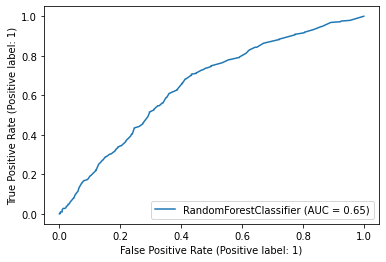

In [78]:
roc(clf, Xnh_test, ynh_test)

### Applying SMOTE for nhanes dataset

In [79]:
sm = SMOTE()
Xnh_train, ynh_train = sm.fit_resample(Xnh_train, ynh_train)
# nhanes
clf.fit(Xnh_train, ynh_train)
prednh = clf.predict(Xnh_test)

### Cross Validation for nhanes after smote

In [80]:
cross(clf, Xnh_train, ynh_train,'f1_macro')

Mean f1_macro of 0.75 with a standard deviation of 0.07


### Model scores for nhanes after smote

In [81]:
skmets(ynh_test, prednh)

{'Accuracy': 0.6331058020477816,
 'Precision': 0.3062330623306233,
 'Sensitivity_recall': 0.39372822299651566,
 'Specificity': 0.7107344632768362,
 'F1_score': 0.34451219512195125}

### Feature Importance for predicting Depression for nhanes after smote

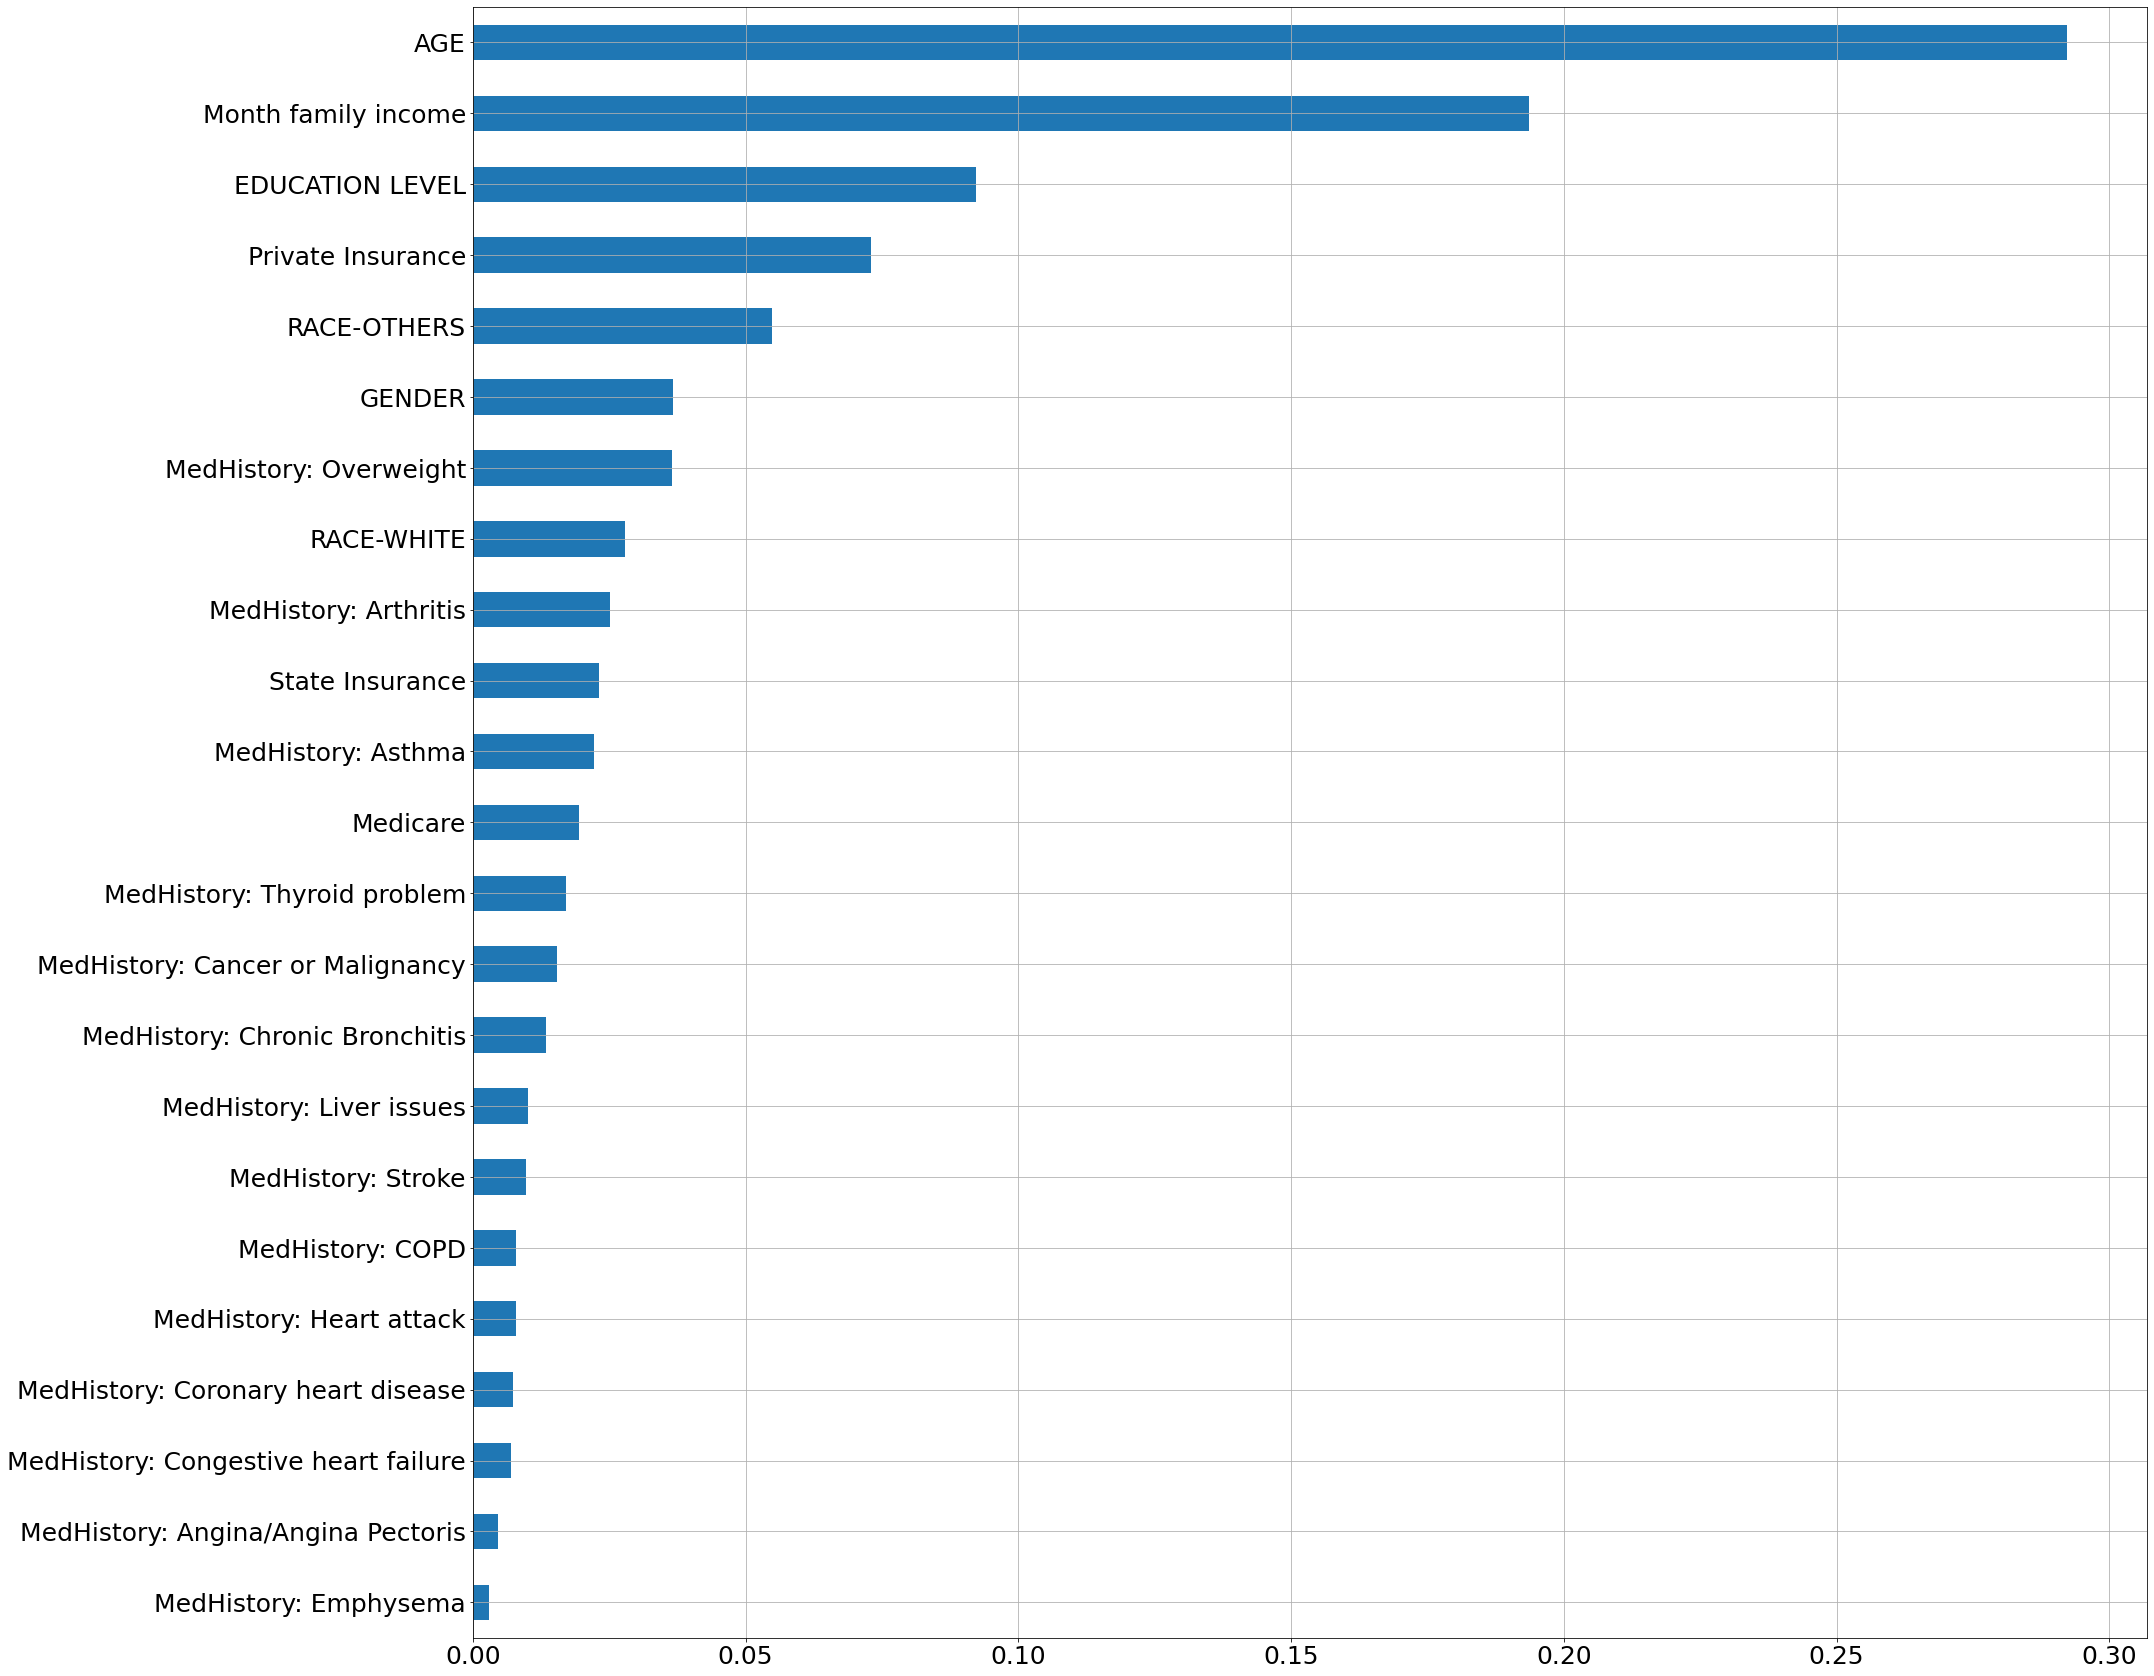

In [82]:
feat_imp(clf, nhanes)

### Confusion matrix for nhanes after smote

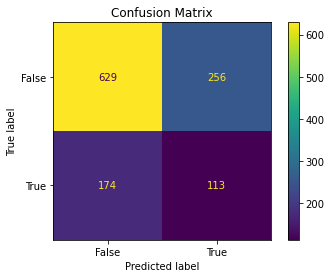

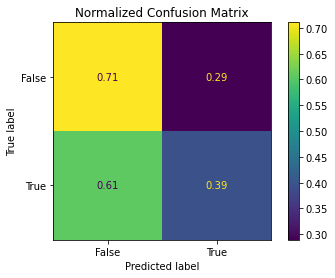

In [83]:
conf_mat(ynh_test, prednh)

### RANDOM FOREST nhanes dataset Report after smote

In [84]:
print(classification_report(ynh_test, prednh))

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       885
           1       0.31      0.39      0.34       287

    accuracy                           0.63      1172
   macro avg       0.54      0.55      0.54      1172
weighted avg       0.67      0.63      0.65      1172



### PR Curve for nhanes after smote

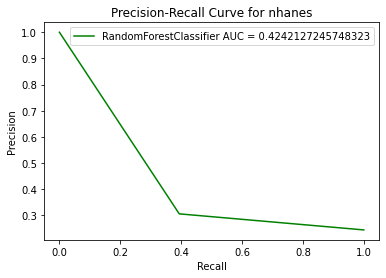

In [85]:
#calculate precision and recall
pr(ynh_test, prednh, 'Precision-Recall Curve for nhanes', 'RandomForestClassifier AUC = ')

###  ROC Curve for nhanes after smote

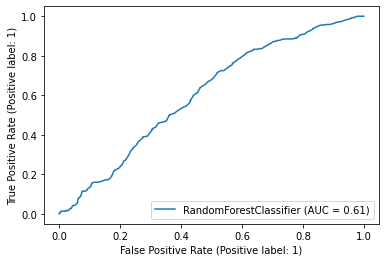

In [86]:
roc(clf, Xnh_test, ynh_test)